<a href="https://colab.research.google.com/github/omi82/Netflix-movie-and-TV-show-Clustering/blob/main/Netflix_Movies_And_TvShows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Netflix movie and TV show Clustering



##### **Project Type - Unsupervised Machine Learning**
##### **Contribution - Individual**
##### **Name -         Omendra Puri**


![alt text here](https://as2.ftcdn.net/v2/jpg/05/39/00/89/1000_F_539008945_AaBYsoFC8tuopYTTXJGinCgy8vNsjagd.jpg)

# **Project Summary -**

**Project Summary:**

This project aims to cluster Netflix movies and TV shows based on their similarities using unsupervised machine learning techniques. The goal is to group together movies and shows that share similar characteristics, such as genre, release year, and user ratings. By doing so, users can more easily discover new content that they might enjoy based on their preferences.

**Methods:**

1. **Data Collection:**
   - Scrape data from the Netflix website or use an existing dataset containing information about Netflix movies and shows.
   - Extract relevant features such as title, genre, release year, and user ratings.

2. **Data Preprocessing:**
   - Clean and prepare the data for clustering.
   - Handle missing values and outliers.
   - Normalize the data if necessary.

3. **Clustering:**
   - Apply unsupervised machine learning algorithms such as K-means or hierarchical clustering to group the movies and shows into clusters.
   - Determine the optimal number of clusters based on the data and the desired level of granularity.

4. **Evaluation:**
   - Evaluate the clustering results using metrics such as silhouette score.
   - Analyze the clusters to understand the characteristics of each group.

5. **Visualization:**
   - Visualize the clusters using scatter plots or dendrograms to show the relationships between the movies and shows.

**Benefits:**

- Improved content discovery for Netflix users.
- Personalized recommendations based on user preferences.
- Identification of trends and patterns in Netflix content.

**Conclusion:**

By applying unsupervised machine learning techniques to Netflix movie and TV show data, this project can provide valuable insights into the content available on the platform and help users find new and interesting content to watch.





# **GitHub Link -**

Repository link-https://github.com/omi82/Netflix-movie-and-TV-show-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go


# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df= pd.read_csv("/content/drive/MyDrive/almabetter/capstone project/Unsurvised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"Rows and Column count in the Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Rows and Column count in the Dataset: Rows= 7787, Columns= 12


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

print("Null value count in each of the variable: ")

print(df.isna().sum())


--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


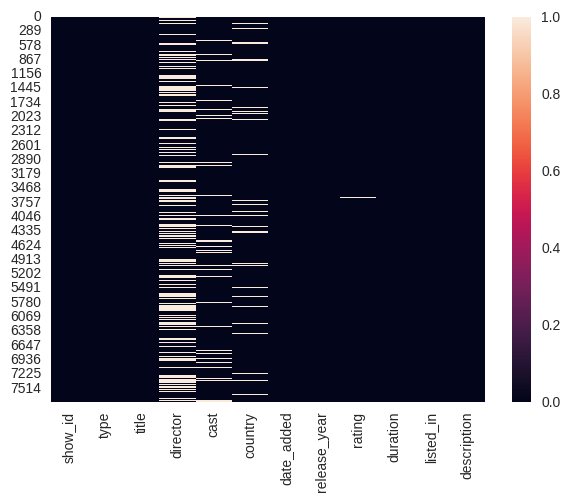

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(), cbar=True)
plt.show()

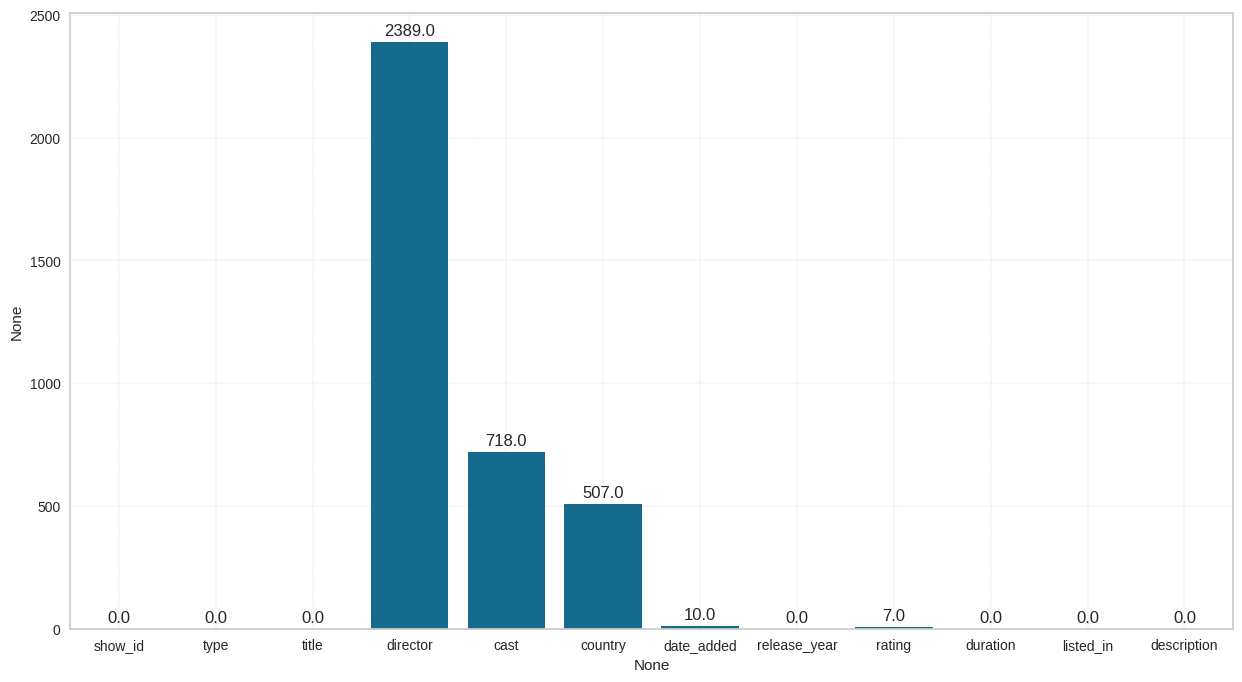

In [11]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=df.columns,y=df.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

### What did you know about your dataset?

- The dataset contains information about Netflix movies and TV shows.
- The dataset has 7787 rows and 12 columns.
- There are no duplicate values in the dataset.
- Five columns have null values: director (2389), cast (718), country (075), date_added (10), and rating (7).
- The percentage of null values in each variable is relatively low, with the highest being 30.67% for the director column.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [13]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description:** The Summary description

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")

for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'show_id' : 7787
'type' : 2
'title' : 7787
'director' : 4049
'cast' : 6831
'country' : 681
'date_added' : 1565
'release_year' : 73
'rating' : 14
'duration' : 216
'listed_in' : 492
'description' : 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

####1.  Handling Null values from each feature

In [15]:
# Missing Values/Null Values Count

print("Null value count in each of the variable: ")
print(df.isna().sum())

Null value count in each of the variable: 
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [52]:
# Percentage of null values in each category

print("Percentage of null values in each variable: ")

null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")

Percentage of null values in each variable: 
title           0.0
Actors          0.0
Directors       0.0
Genre           0.0
Country         0.0
type            0.0
release_year    0.0
rating          0.0
duration        0.0
description     0.0
day_added       0.0
month_added     0.0
year_added      0.0
dtype: float64%


In [17]:
df["date_added"].value_counts()

date_added
January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: count, Length: 1565, dtype: int64

In [18]:
df['rating'].value_counts()

rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [19]:
df['country'].value_counts()

country
United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64

1. Since 'date_added' and 'rating' has very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.
2. We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.
3. We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

In [20]:
## Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [51]:
# Rechecking the Missing Values/Null Values Count

print("Null value count in each of the variable: ")

print(df.isna().sum())

Null value count in each of the variable: 
title           0
Actors          0
Directors       0
Genre           0
Country         0
type            0
release_year    0
rating          0
duration        0
description     0
day_added       0
month_added     0
year_added      0
dtype: int64


####2.  Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [22]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [23]:
# Unnesting 'Directors' column
dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(5)

title            Directors
4429        Minute to Win It              Unknown
7372     The Princess Switch              Unknown
4714                  My Way  Antongiulio Panizzi
815    Basketball or Nothing              Unknown
2084  Eh Janam Tumhare Lekhe         Harjit Singh

In [24]:
# Unnesting 'cast' column
cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

title  \
47586                                       The Lift Boy   
41180                                         Special 26   
6065                                        Been So Long   
3261                              Alt-Right: Age of Rage   
28316                                              Maria   
49687  The Seven Deadly Sins the Movie: Prisoners of ...   
6589                                   Beyond the Clouds   
37227                                       RIDE ON TIME   
32260                                        No Tomorrow   
50074                                       THE STRANGER   

                      Actors  
47586        Kaustubh Narain  
41180         Jimmy Shergill  
6065           Ashley Thomas  
3261   Daryle Lamont Jenkins  
28316         Cristine Reyes  
49687           Yuhei Takagi  
6589              Hema Singh  
37227               SixTONES  
32260       Jonathan Langdon  
50074           Shaun Dooley

In [25]:
# Unnesting 'listed_in' column
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(5)



title              Genre
8969              Miles Davis: Birth of the Cool      Documentaries
3148   Club Friday To Be Continued - The Promise  Romantic TV Shows
12979                           Sword Art Online       Anime Series
8793                          Meet the Adebanjos   British TV Shows
4806                              Five Came Back         Docuseries

In [26]:
# Unnesting 'country' column
country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

title        Country
3804                                  Jal          India
4345  LEGO Jurassic World: Secret Exhibit  United States
3027            Good Night, and Good Luck          Japan
6616                 Septembers of Shiraz  United States
8878               True: Happy Hearts Day         Canada
2133                     Dil Hai Tumhaara          India
4175                         Kraftidioten         Sweden
4856                             Merantau      Indonesia
1264                     Bonnie and Clyde  United States
6606                         Semana Santa         Mexico


Certainly! We have successfully separated the nested columns. Let's now merge all the created dataframes into a single, unified dataframe.

## Merging all the unnested dataframes

In [27]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

title            Actors Directors                   Genre Country
0    3%       João Miguel   Unknown  International TV Shows  Brazil
1    3%       João Miguel   Unknown               TV Dramas  Brazil
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil

Great! Now, let's merge this dataframe with the original one using a left join to prevent any loss of information.

In [28]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head()

title            Actors Directors                   Genre Country     type  \
0    3%       João Miguel   Unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel   Unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil  TV Show   

        date_added  release_year rating   duration  \
0  August 14, 2020          2020  TV-MA  4 Seasons   
1  August 14, 2020          2020  TV-MA  4 Seasons   
2  August 14, 2020          2020  TV-MA  4 Seasons   
3  August 14, 2020          2020  TV-MA  4 Seasons   
4  August 14, 2020          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...  
2  In a future where the elite inhabit an island ...  
3  In a future where the elite inhabit an island ...  
4  In a future where the elite inhabit an island ...

#### 3. Typecasting of attributes

In [29]:
# Checking info of the dataset before typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175807 entries, 0 to 175806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   date_added    175807 non-null  object
 7   release_year  175807 non-null  int64 
 8   rating        175807 non-null  object
 9   duration      175807 non-null  object
 10  description   175807 non-null  object
dtypes: int64(1), object(10)
memory usage: 14.8+ MB


In [30]:
# # Typecasting duration into integer by removing 'min' and 'season' from the end
# df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

# # Typecasting string object to datetime object of date_added column
# df['date_added']= pd.to_datetime(df['date_added'])

# # Extracting date, day, month and year from date_added column
# df["day_added"]= df["date_added"].dt.day
# df["month_added"]= df["date_added"].dt.month
# df["year_added"]= df["date_added"].dt.year



In [31]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

In [32]:
# Typecasting string object to datetime object of date_added column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extracting date, day, month and year from date_added column
df["day_added"] = df["date_added"].dt.day
df["month_added"] = df["date_added"].dt.month
df["year_added"] = df["date_added"].dt.year

# Dropping rows with NaT values (parsing errors)
df = df.dropna(subset=['date_added'])

# Dropping date_added column
df.drop('date_added', axis=1, inplace=True)


In [33]:
# Checking info of the dataset after typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174219 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         174219 non-null  object 
 1   Actors        174219 non-null  object 
 2   Directors     174219 non-null  object 
 3   Genre         174219 non-null  object 
 4   Country       174219 non-null  object 
 5   type          174219 non-null  object 
 6   release_year  174219 non-null  int64  
 7   rating        174219 non-null  object 
 8   duration      174219 non-null  int64  
 9   description   174219 non-null  object 
 10  day_added     174219 non-null  float64
 11  month_added   174219 non-null  float64
 12  year_added    174219 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 18.6+ MB


#### 4. Binning of Rating attribute

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14**: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG**: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR**: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G**: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y**: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG**: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G**: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17**: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR**: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.


**Let's not complicate it and create bins as following:**
* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [34]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [35]:
# Checking head after binning
df.head()

title            Actors Directors                   Genre Country     type  \
0    3%       João Miguel   Unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel   Unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil  TV Show   

   release_year         rating  duration  \
0          2020  Adult Content         4   
1          2020  Adult Content         4   
2          2020  Adult Content         4   
3          2020  Adult Content         4   
4          2020  Adult Content         4   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...       14.0          8.0   
1  In a future where the elite inhabit an island ...       14.0          8.0   
2  In a future where the elite inhabit an island ...       14.0          8.0   
3  In a future where the elite inhabit an island ...       14.0          8.0   
4  In a future where the elite inhabit an island ...       14.0          8.0   

   year_added  
0      2020.0  
1      2020.0  
2      2020.0  
3      2020.0  
4      2020.0

#### 5. Separating Movies and TV Shows

In [36]:
# Spearating the dataframes for further analysis
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 13) (48140, 13)


### What all manipulations have you done and insights you found?

**Data Wrangling Manipulations:**

1. **Missing Values Handling:**
    * Imputed missing values in `director`, `cast`, and `country` columns with "Unknown" and the mode value, respectively.
    * Dropped rows with missing values in `date_added` and `rating` columns due to low percentage.

2. **Unnesting Nested Columns:**
    * Separated nested values in `director`, `cast`, `listed_in`, and `country` columns into separate dataframes.
    * Merged these individual dataframes with the original dataframe using left join to preserve all information.

3. **Typecasting:**
    * Converted `duration` column values to integers by removing "min" and "season" suffixes.
    * Converted `date_added` column values to datetime format.
    * Extracted `day_added`, `month_added`, and `year_added` features from the `date_added` column.

4. **Rating Binning:**
    * Grouped various rating categories into five bins: Adult Content, Children Content, Teen Content, Family-friendly Content, and Not Rated.
    * Replaced original rating values with corresponding bin names.

5. **Separating Movies and TV Shows:**
    * Created separate dataframes `df_movies` and `df_tvshows` for movies and TV shows, respectively.

**Insights:**

* The dataset initially contained missing values in several columns, which were addressed through imputation and dropping.
* Unnesting nested columns allowed for better analysis and exploration of individual entities within those columns.
* Typecasting ensured appropriate data types for various features, enabling accurate calculations and comparisons.
* Binning the rating column simplified the analysis by grouping similar content ratings together.
* Separating movies and TV shows facilitated separate analysis and insights for each type of content.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 The relative percentage of total number of Movies and TV Shows over Netflix

In [37]:
# Chart - 1 visualization code

labels = ['TV Show', 'Movie']
values = [df.type.value_counts()[1], df.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#48D1CC']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))


##### 1. Why did you pick the specific chart?

The pie chart is a suitable choice for visualizing the distribution of categorical data, such as the type of content watched on Netflix. It allows for easy comparison of the proportions of TV Shows and Movies in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The pie chart shows that Movie constitute the majority, accounting for 71.7% of the content watched on Netflix, while TV shows make up a smaller percentage of 28.3%. This suggests that Netflix users prefer watching movies over TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by allowing Netflix to tailor its content offerings and marketing strategies to better meet the preferences of its users. For example, Netflix could focus on acquiring more movies to cater to the majority of its users who prefer watching movies. Additionally, Netflix could explore ways to make TV shows more appealing to its users, such as by investing in higher-quality TV shows or promoting TV shows more prominently on its platform.

There are no insights that lead to negative growth.

#### Chart - 2 How content is distributed over Netflix?

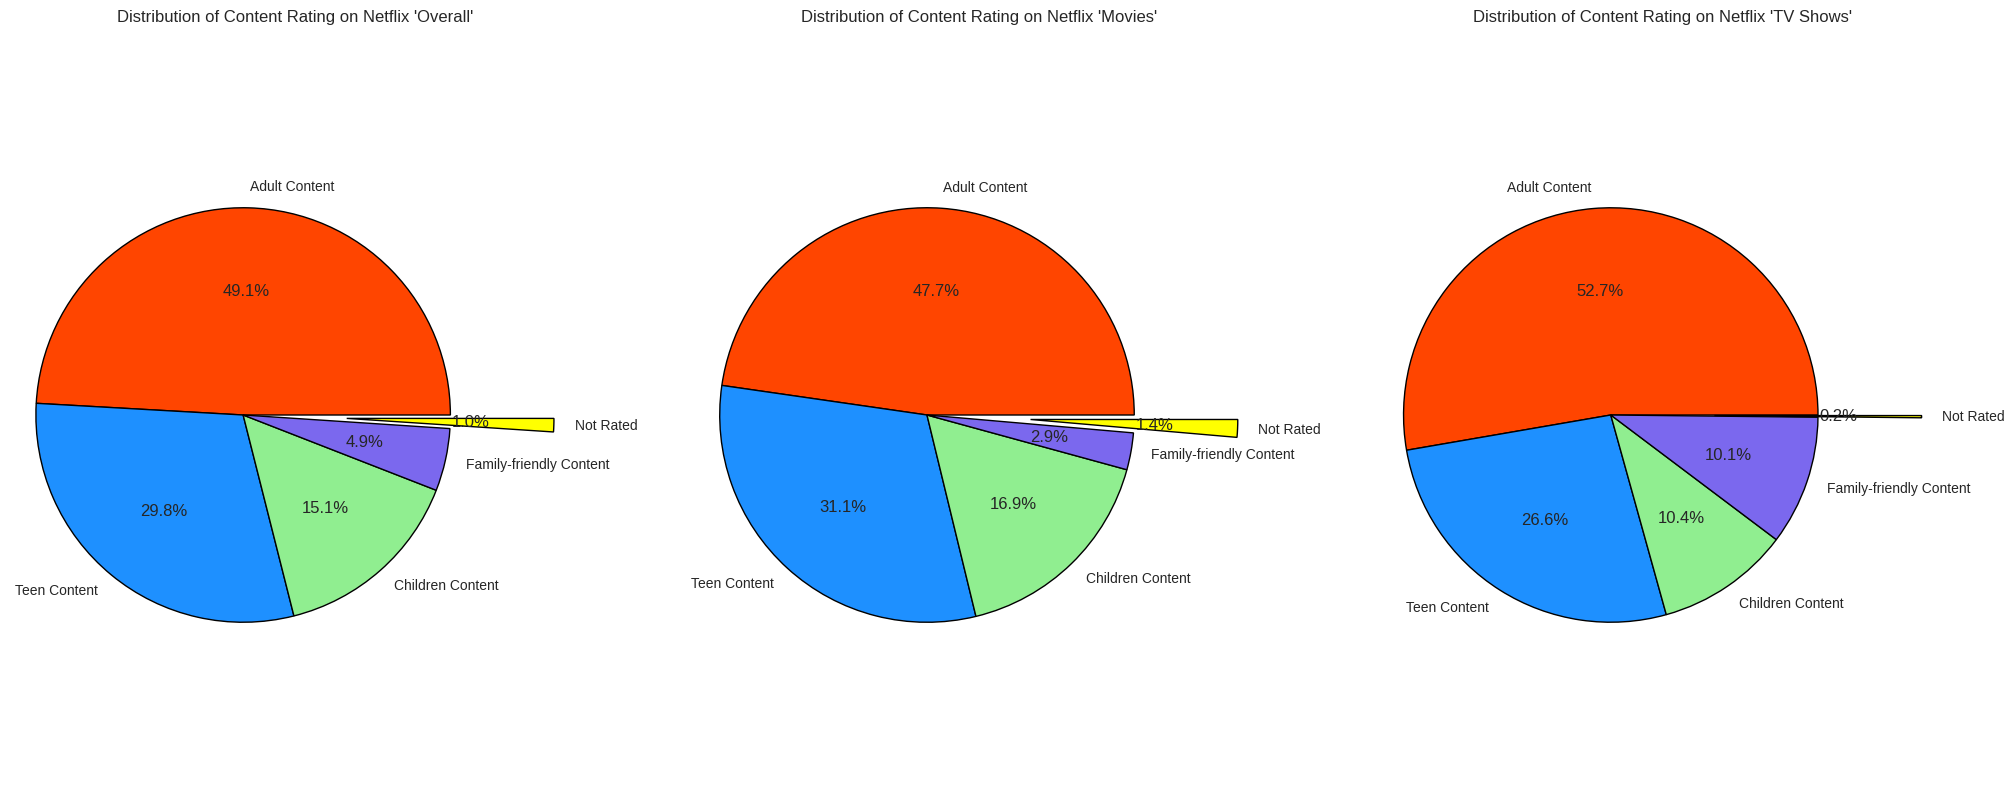

In [38]:
plt.figure(figsize=(25,10))
for i,j,k in ((df, 'Overall',0),(df_movies, 'Movies',1),(df_tvshows, 'TV Shows',2)):
  plt.subplot(1,3,k+1)
  count= i['rating'].value_counts()
  plt.pie(count, labels=count.index,explode=(0,0,0,0,0.5),colors=['orangered','dodgerblue','lightgreen','mediumslateblue','yellow'],
          autopct='%1.1f%%', labeldistance=1.1,wedgeprops={"edgecolor" : "black",'linewidth': 1,'antialiased': True})
  plt.title(f"Distribution of Content Rating on Netflix '{j}'")
  plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart is a suitable choice for visualizing the distribution of categorical data, such as the content rating of Netflix content. It allows for easy comparison of the proportions of different content ratings within the dataset.

##### 2. What is/are the insight(s) found from the chart?


   - Both movies and TV shows on Netflix have a significant portion of content rated as "Adult Content."
   - Teen-rated content is the second-most prevalent category for both
     movies and TV shows.
   - Movies have a lower proportion of family-friendly content compared to TV shows.
   - A notable amount of content on Netflix is not rated.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by allowing Netflix to tailor its content offerings and marketing strategies to better meet the preferences of its users. For example, Netflix could focus on acquiring more movies and TV shows that fall into the "Adult Content" and "Teen Content" categories, as these are the most popular among its users. Additionally, Netflix could explore ways to make family-friendly content more appealing to its users, such as by investing in higher-quality TV shows or promoting TV shows more prominently on its platform.

There are no insights that lead to negative growth.

#### Chart - 3 The top actors performing in Movies and TV Shows

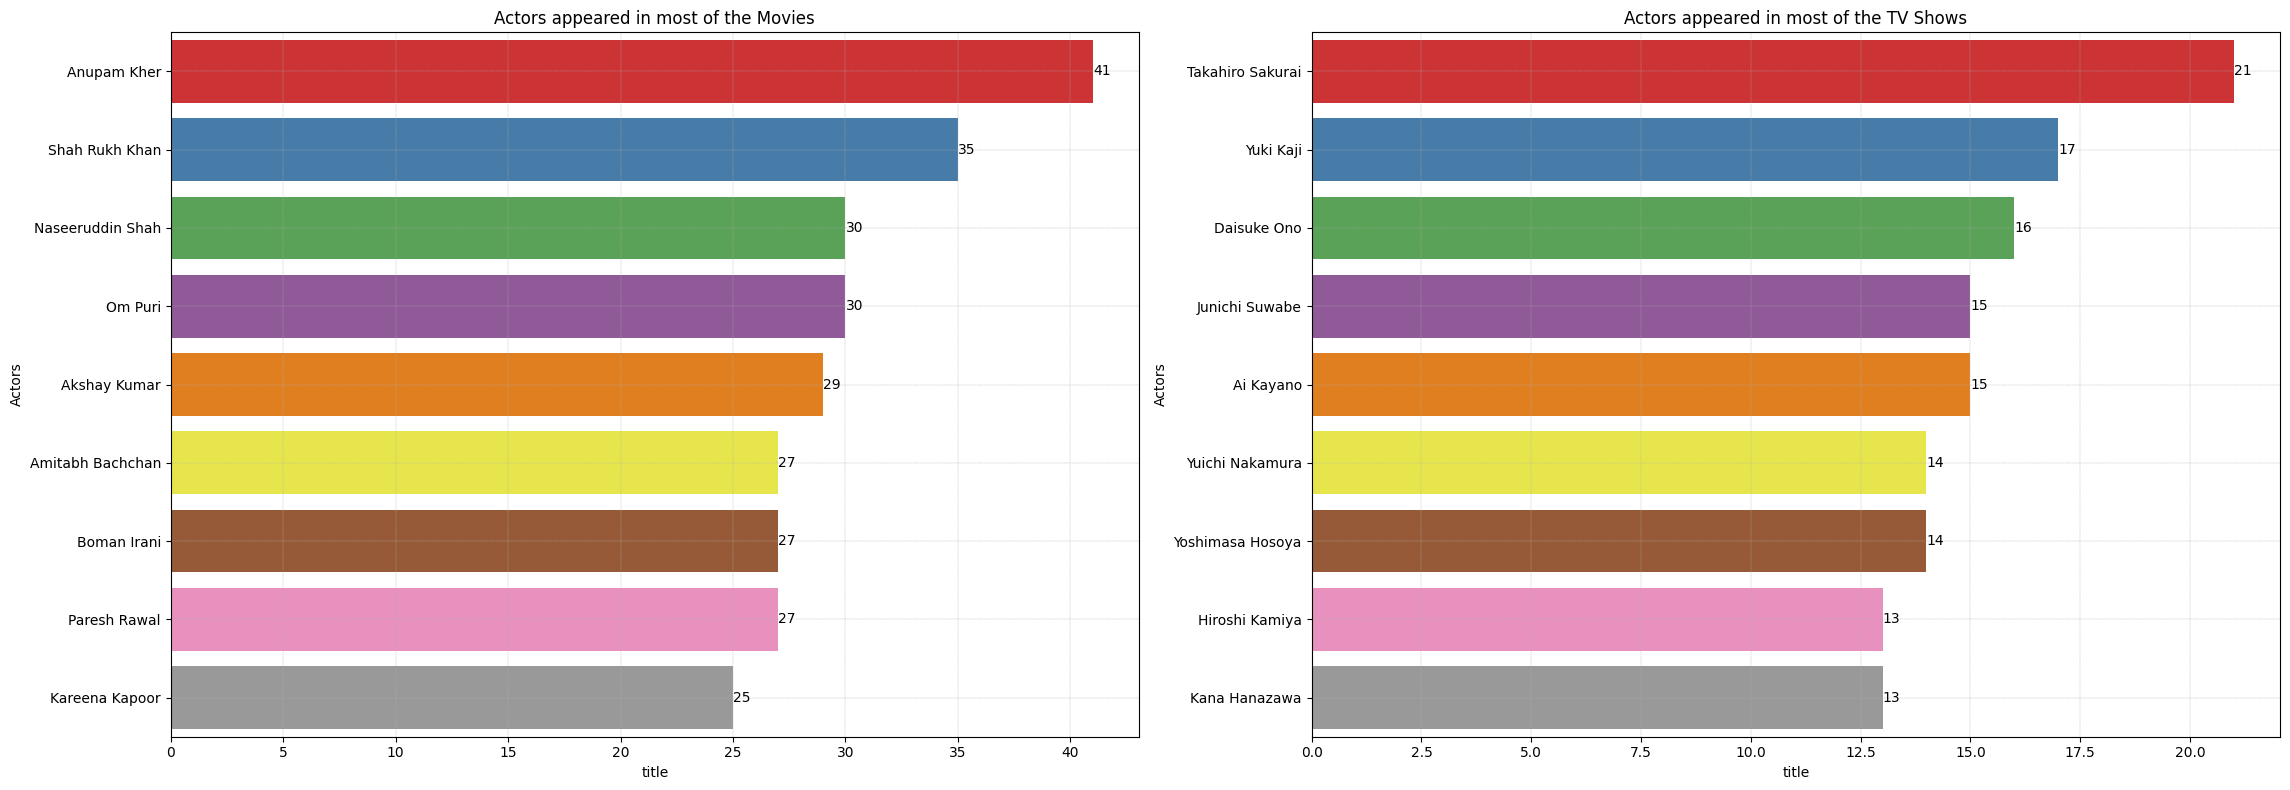

In [39]:
# Top 10 casts in Movies and TV Shows
# Set the default plot style
plt.style.use('default')

# Create a figure and axes
plt.figure(figsize=(23, 8))

# Iterate over the dataframes and plot the top actors in movies and TV shows
for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
    plt.subplot(1, 2, k + 1)

    # Group by 'Actors' and count unique 'title' (assuming 'title' represents the number of appearances)
    df_actor = i.groupby(['Actors']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[1:10]

    # Create a bar plot using Seaborn
    plots = sns.barplot(y="Actors", x='title', data=df_actor, palette='Set1')

    # Set plot title and grid
    plt.title(f'Actors appeared in most of the {j}')
    plt.grid(linestyle='--', linewidth=0.3)

    # Add labels to the bars with the count of appearances
    for container in plots.containers:
        plots.bar_label(container)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The horizontal bar chart is a suitable choice for this analysis because it allows for easy comparison of the number of appearances for each actor. The bars are arranged in descending order, making it easy to identify the actors with the most appearances.

##### 2. What is/are the insight(s) found from the chart?

- We found an interesting insight that **most of the Actors in Movies are from INDIA.**

- No popular actors from india in TV Shows.
- Takahiro Sakurai is the actor with the most appearances in TV shows on Netflix.
- Anupam Kher is the actor with the most appearances in movies on Netflix.
- The top 10 actors in both TV shows and movies have a significant number of appearances, indicating their popularity and demand on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by allowing Netflix to tailor its content offerings and marketing strategies to better meet the preferences of its users. For example, Netflix could focus on acquiring more movies and TV shows that feature the top actors identified in the visual. Additionally, Netflix could explore ways to promote these actors and their content more prominently on its platform. This could lead to increased viewership and engagement, which can ultimately have a positive impact on Netflix's business.

There are no insights that lead to negative growth.

#### Chart - 4  The top 10 Directors directing Movies and TV Shows

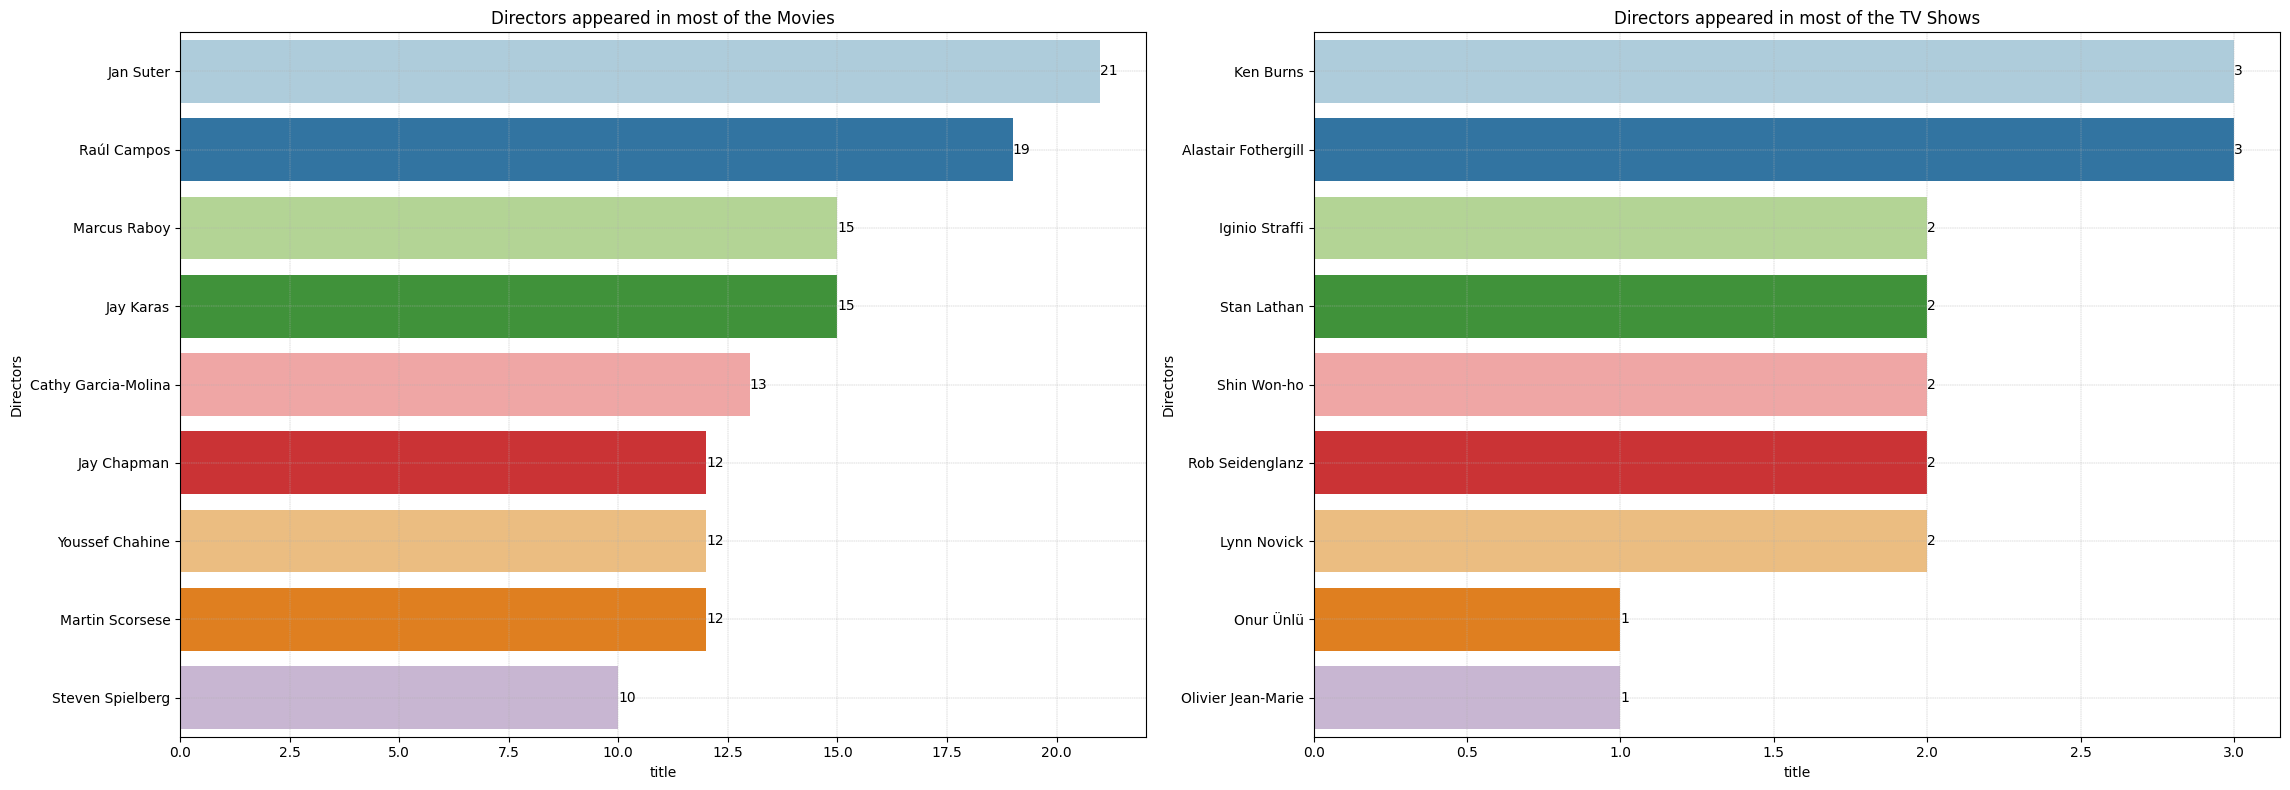

In [40]:
# Top 10 Directors in Movies and TV Shows
# Set the default plot style
plt.style.use('default')

# Create a figure and axes
plt.figure(figsize=(23, 8))

# Iterate over the dataframes and plot the top directors in movies and TV shows
for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
    plt.subplot(1, 2, k + 1)

    # Group by 'Directors' and count unique 'title' (assuming 'title' represents the number of appearances)
    df_director = i.groupby(['Directors']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[1:10]

    # Create a bar plot using Seaborn
    plots = sns.barplot(y="Directors", x='title', data=df_director, palette='Paired')

    # Set plot title and grid
    plt.title(f'Directors appeared in most of the {j}')
    plt.grid(linestyle='--', linewidth=0.3)

    # Add labels to the bars with the count of appearances
    for container in plots.containers:
        plots.bar_label(container)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


The horizontal bar chart is a suitable choice for this analysis because it allows for easy comparison of the number of appearances for each director. The bars are arranged in descending order, making it easy to identify the directors with the most appearances.

##### 2. What is/are the insight(s) found from the chart?

- Jan Suter is the director with the most appearances in movies on Netflix.
- Ken Burns is the director with the most appearances in TV shows on Netflix.
- There is a significant difference in the directors who are most popular in movies and TV shows.
- This suggests that different factors may influence the success of a movie or TV show on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight can help create a positive business impact by allowing Netflix to tailor its content offerings and marketing strategies to better meet the preferences of its users. For example, Netflix could focus on acquiring more movies and TV shows that feature the top directors identified in the visual. Additionally, Netflix could explore ways to promote these directors and their content more prominently on its platform. This could lead to increased viewership and engagement, which can ultimately have a positive impact on Netflix's business.

There are no insights that lead to negative growth.

#### Chart - 5 The top 10 Countries involved in content creation

In [41]:
# df_country = df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
# plt.figure(figsize=(15,6))
# plots= sns.barplot(y = "Country",x = 'title', data = df_country)
# plt.xticks(rotation = 60)
# plt.title('Top 10 Countries for content creation')
# plt.grid(linestyle='--', linewidth=0.3)
# plots.bar_label(plots.containers[0])
# plt.show()

In [42]:
import plotly.express as px
df_country = df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
# Sort the dataframe by 'title' in ascending order to get the funnel chart order
df_country_sorted = df_country.sort_values(by='title', ascending=False)

# Create a funnel chart using Plotly Express
fig = px.funnel(df_country_sorted, x='title', y='Country', title='Top 10 Countries for Content Creation',
                labels={'title': 'Number of Titles', 'Country': 'Country'},
                color_discrete_sequence=px.colors.qualitative.Plotly,
                height=600,
                width=900,
                template='plotly_dark'
                )

# Update layout for better readability
fig.update_layout(title_x=0.5, xaxis_title='Number of Titles', yaxis_title='Country')

# Show the funnel chart
fig.show()

##### 1. Why did you pick the specific chart?


The funnel chart is a suitable choice for visualizing the data on top content-creating countries because it allows for easy comparison of the number of titles produced by each country. The chart is arranged in descending order, making it easy to identify the countries that produce the most content on Netflix.

##### 2. What is/are the insight(s) found from the chart?


- The United States is the leading country in content creation on Netflix, with over 3700 titles.
- India,The United Kingdom, Canada, and Japan are also major content producers for Netflix.
- There is a significant drop in the number of titles produced by countries after the top 5.
- This suggests that there is a large disparity in the amount of content produced by different countries on Netflix.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights can help create a positive business impact by allowing Netflix to tailor its content offerings and marketing strategies to better meet the preferences of its users. For example, Netflix could focus on acquiring more content from the top content-creating countries, such as the United States, India, and the United Kingdom. Additionally, Netflix could explore ways to promote content from these countries more prominently on its platform. This could lead to increased viewership and engagement, which can ultimately have a positive impact on Netflix's business.

There are no insights that lead to negative growth.

#### Chart - 6 The top 10 Countries, which has the highest spread of Movies and TV Shows over Netflix

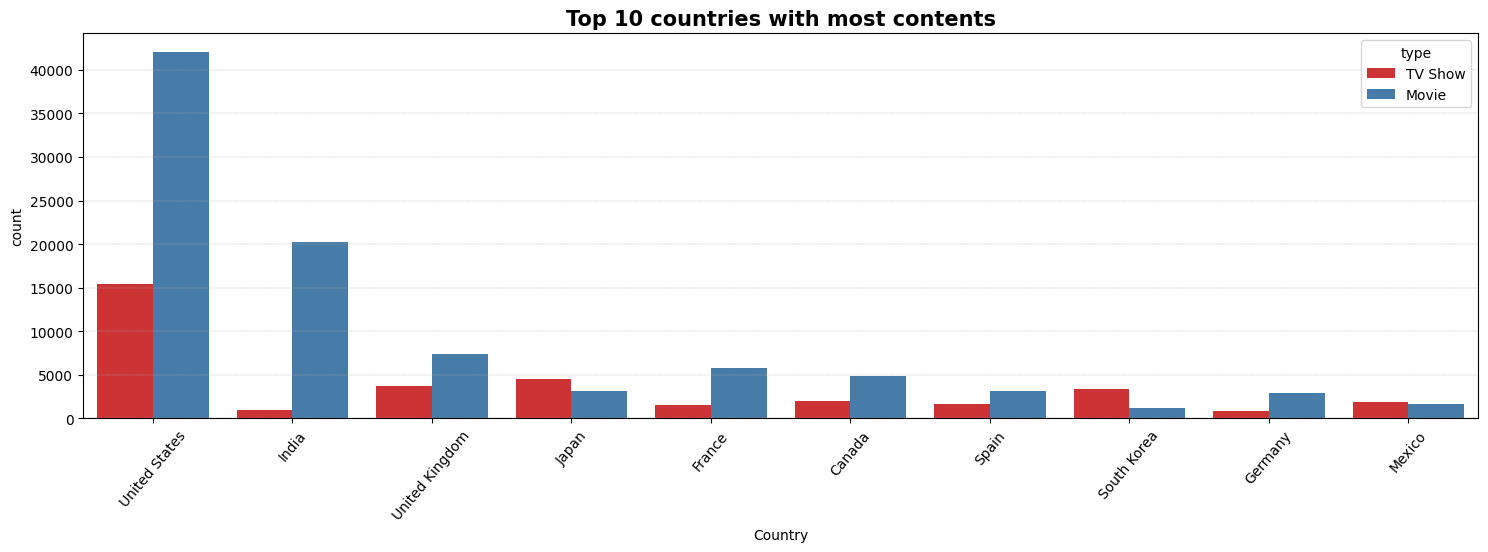

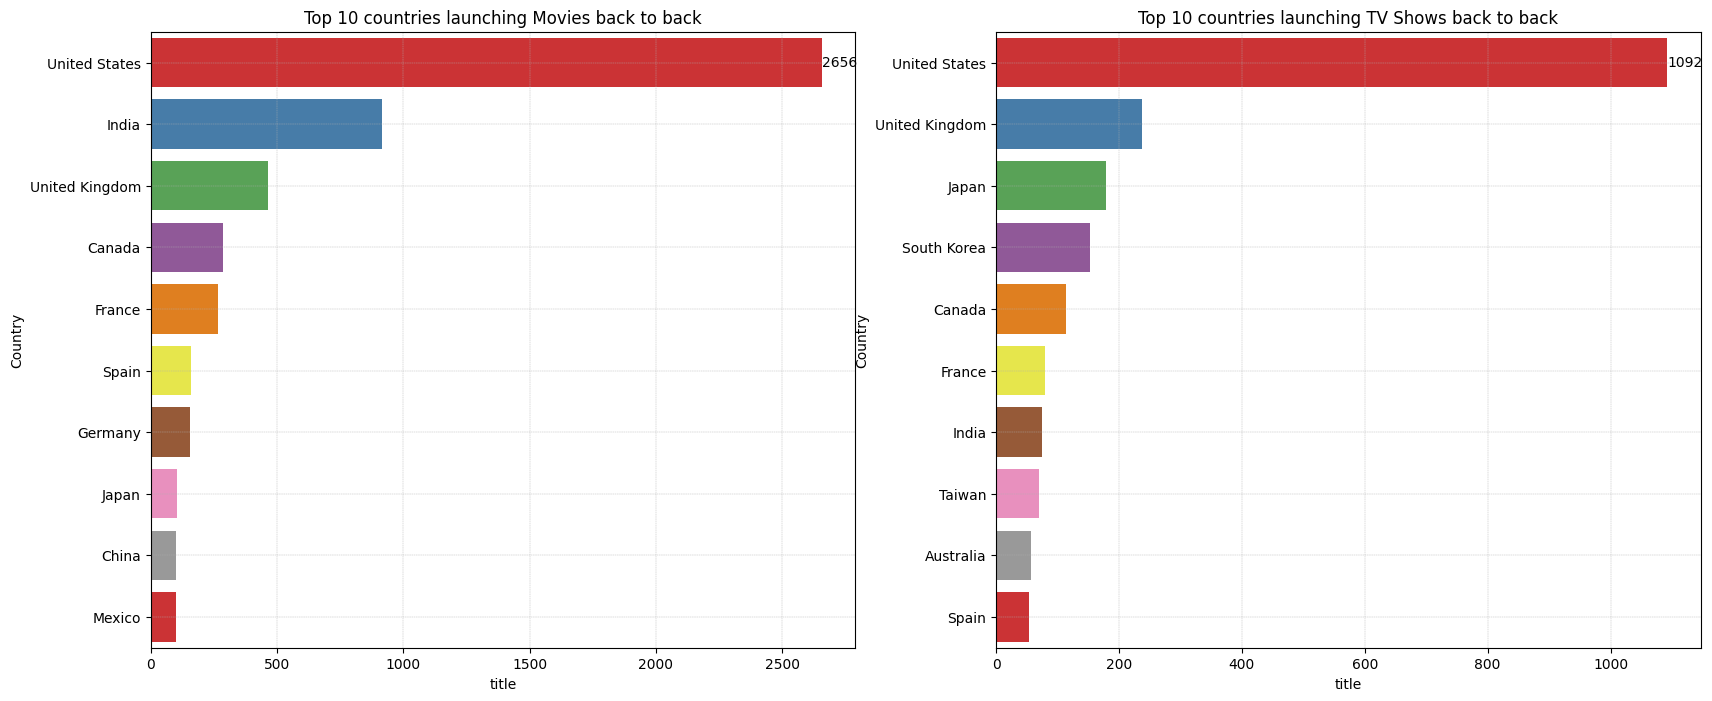

In [43]:
#Analysing top 10 countries with most content
plt.figure(figsize=(18,5))
plt.grid(linestyle='--', linewidth=0.3)
sns.countplot(x=df['Country'],order=df['Country'].value_counts().index[0:10],hue=df['type'],palette ="Set1")
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

plt.figure(figsize=(20,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Country",x = 'title', data = df_country, palette='Set1')
  plt.title(f'Top 10 countries launching {j} back to back')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?


The specific chart chosen is a combination of a countplot and two barplots. This type of chart was chosen because it allows for a comprehensive analysis of the distribution of movies and TV shows across different countries. The countplot shows the total number of movies and TV shows for each country, while the two barplots show the top 10 countries with the most movies and TV shows separately. This allows for easy comparison and identification of the countries with the largest and smallest number of movies and TV shows, as well as the countries that are most focused on producing either movies or TV shows.

##### 2. What is/are the insight(s) found from the chart?

1. The United States has the most content on Netflix, followed by India and the United Kingdom.
2. The United States produces the most movies, followed by India and Canada.
3. The United States produces the most TV shows, followed by the United Kingdom and Japan.
4. The United States has the widest spread of content, with a significant number of both movies and TV shows.
5. India has a strong focus on movies, with a much higher number of movies than TV shows.
6. Japan has a strong focus on TV shows, with a much higher number of TV shows than movies.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights can help create a positive business impact by highlighting opportunities for growth and expansion, such as investing in American, Indian, and British content, and acquiring more diverse content. It can also help Netflix tailor its content offerings to the preferences of users in different countries. There are no insights that lead to negative growth.

#### Chart - 7 Top 10 Popular genres are on Netflix

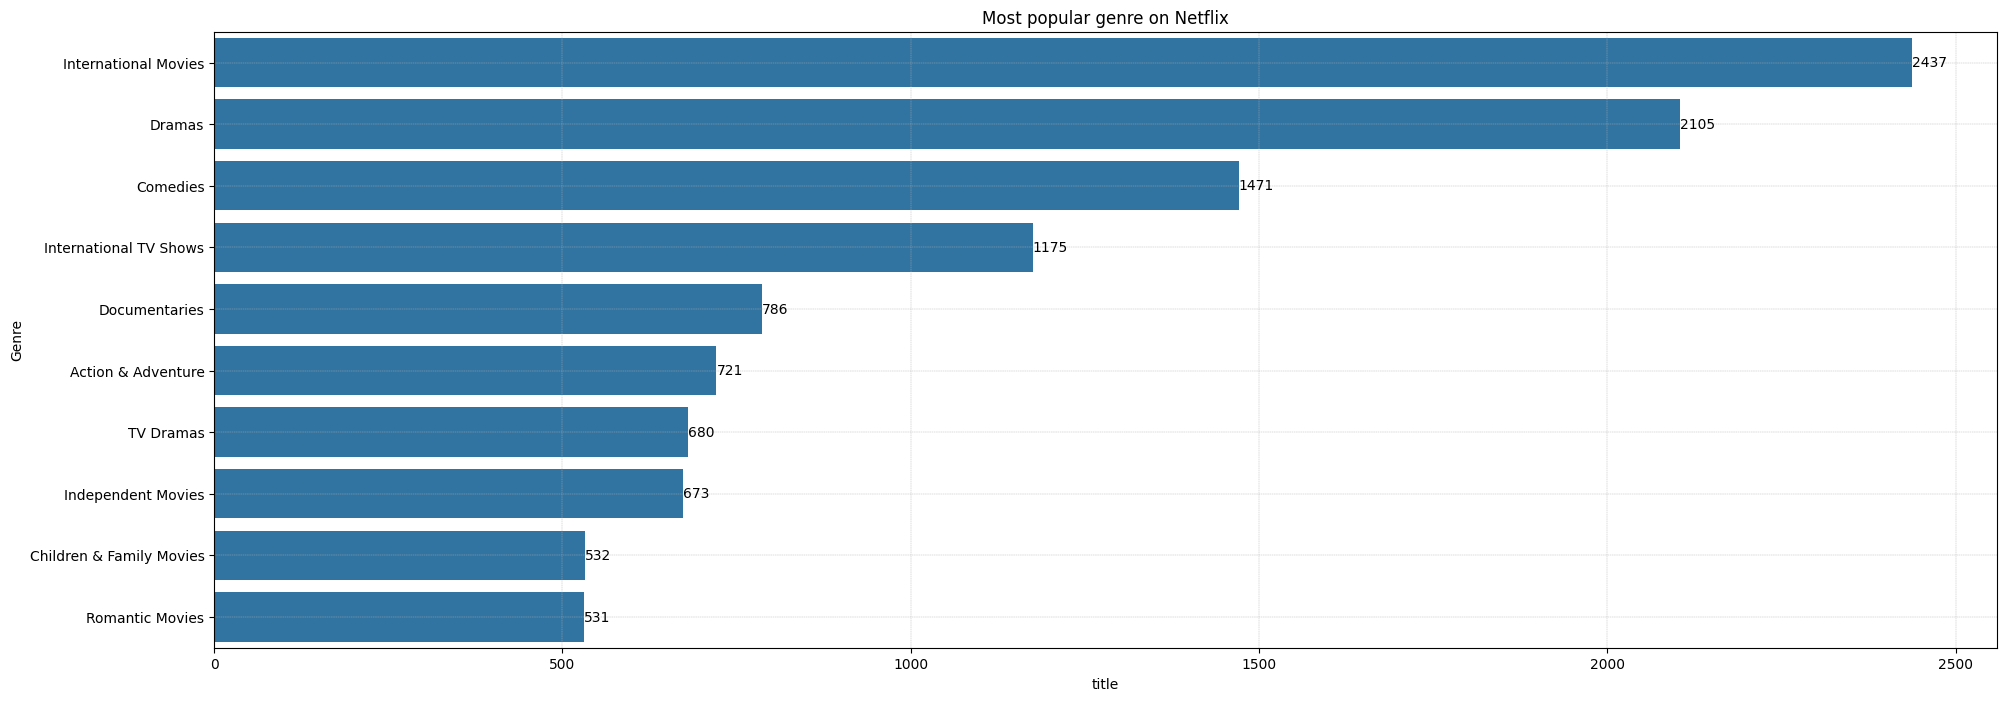

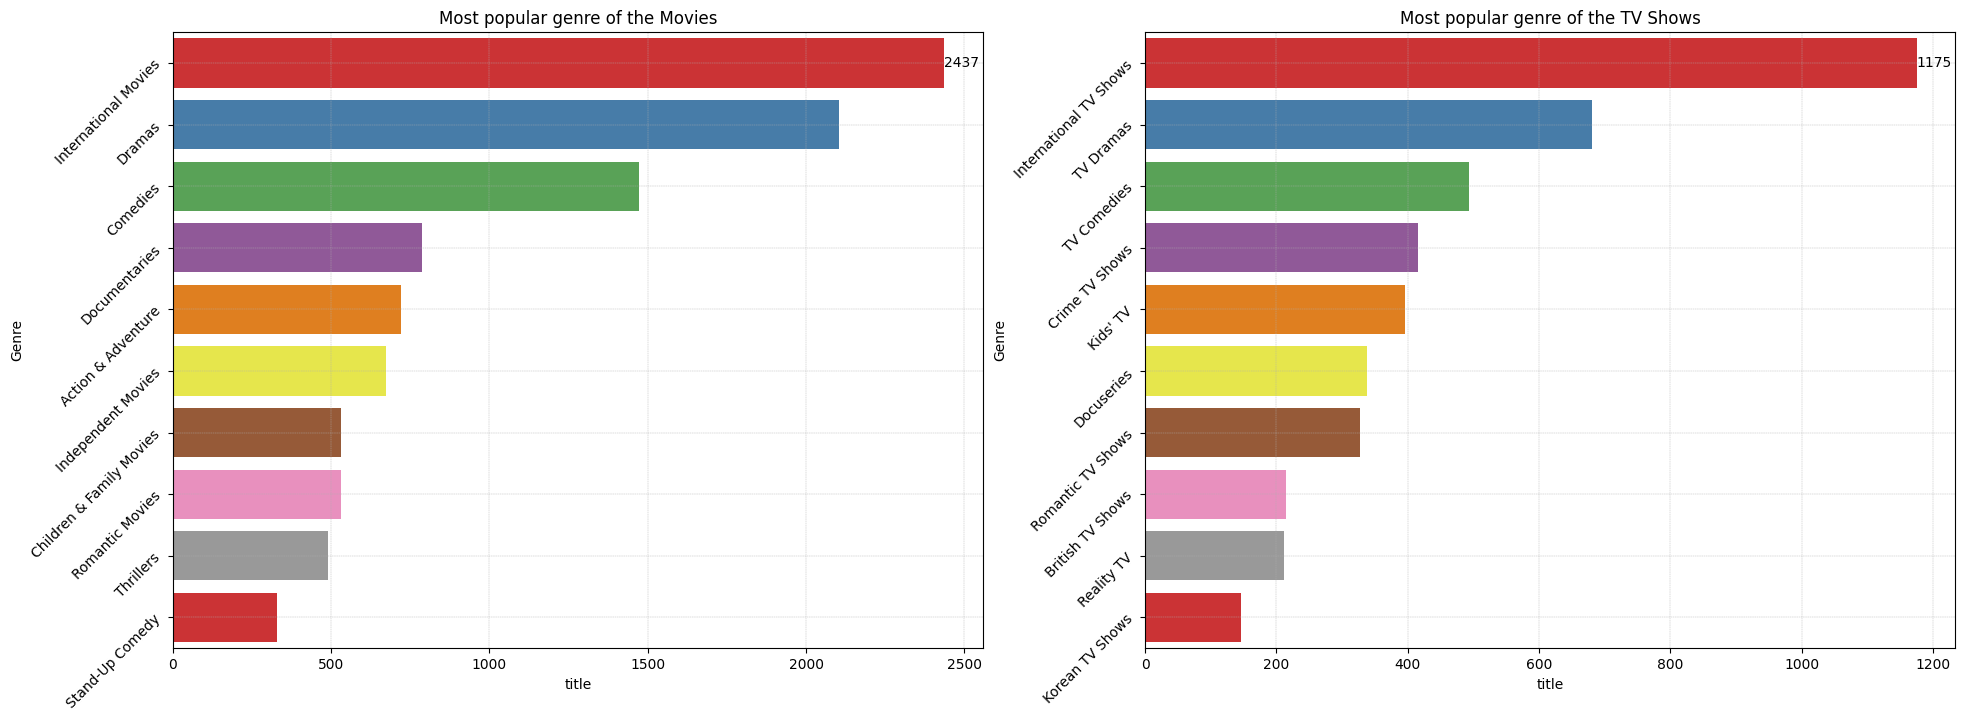

In [44]:
# Top 10 popular genre on netflix
plt.figure(figsize=(23,8))
df_genre = df.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plots= sns.barplot(y = "Genre",x = 'title', data = df_genre)
plt.title(f'Most popular genre on Netflix')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_genre = i.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette='Set1')
  plt.title(f'Most popular genre of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?


The specific chart chosen is a combination of a barplot. This type of chart was chosen because it allows for a comprehensive analysis of the most popular genres on Netflix, as well as the most popular genres for movies and TV shows separately. This allows for easy comparison and identification of the most popular and least popular genres, as well as the genres that are most popular for movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

- International movies genre is most popular in both the TV Shows and Movies category.
- Drama and comedy are also popular genres across both categories.
- Action and thriller genres are more popular in movies compared to TV shows.
- There is a significant difference in the most popular genres for movies and TV shows. This suggests that different factors may influence the success of a movie or TV show on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will create a positive business impact. By understanding the most popular genres and types of content on Netflix, the platform can tailor its content acquisition and production strategies to better cater to the preferences of its viewers. This can lead to increased engagement and customer satisfaction, which can ultimately have a positive impact on Netflix's business.

#### Chart - 8 Total number of Movies/TV Shows released and added per year on Netflix

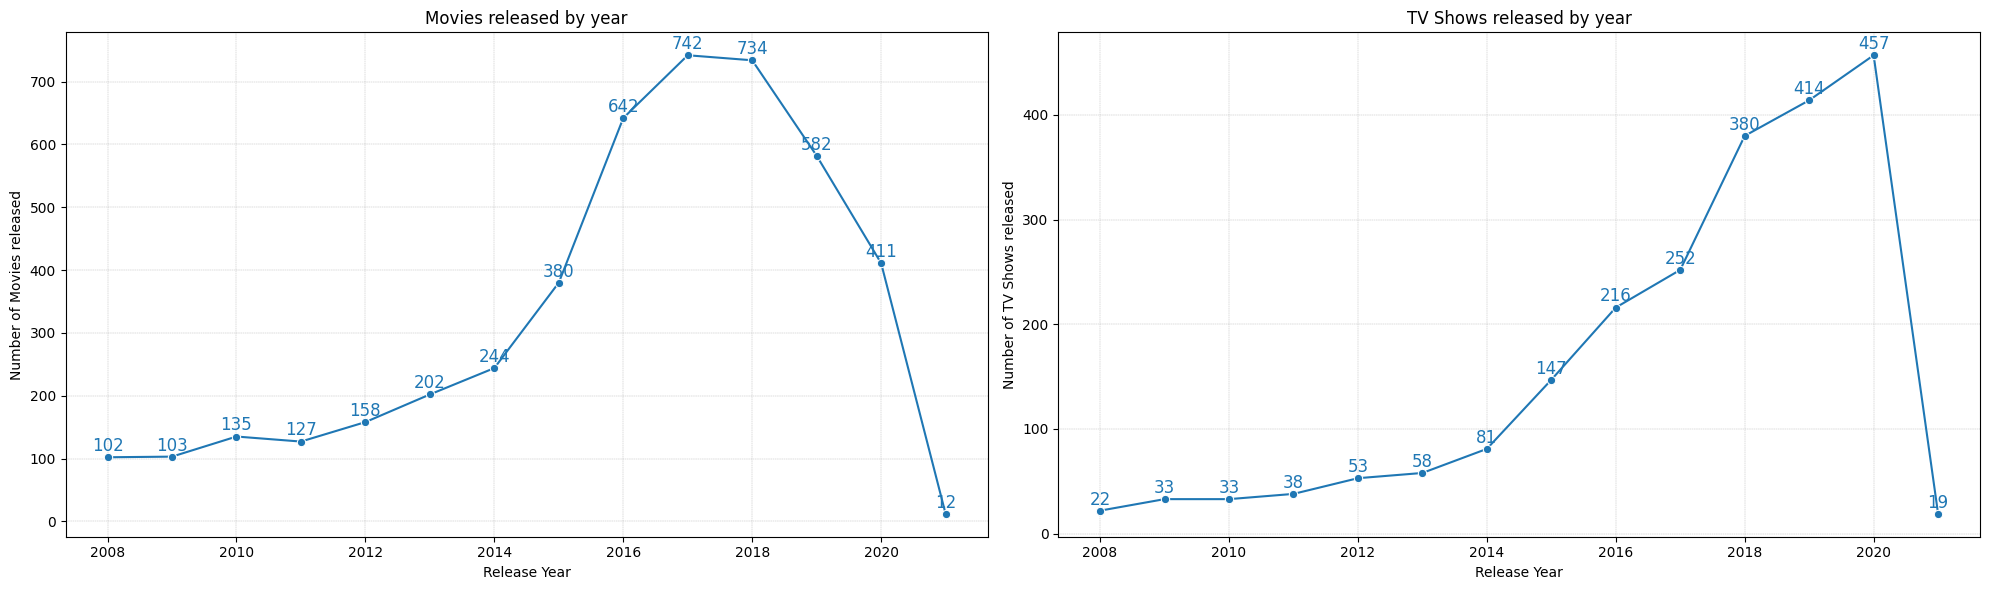

In [45]:
# Set figure size and style
plt.figure(figsize=(20, 6))

# Iterate over movies and TV shows dataframes
for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
    plt.subplot(1, 2, k + 1)

    # Group by 'release_year' and count unique 'title' (assuming 'title' represents the number of movies/TV shows released)
    df_release_year = i.groupby(['release_year']).agg({'title': 'nunique'}).reset_index().sort_values(by=['release_year'], ascending=False)[:14]

    # Create a line plot using Seaborn
    plots = sns.lineplot(x='release_year', y='title', data=df_release_year, marker='o', palette='husl')

    # Set plot title, labels, and grid
    plt.title(f'{j} released by year')
    plt.xlabel('Release Year')
    plt.ylabel(f"Number of {j} released")
    plt.grid(linestyle='--', linewidth=0.3)

    # Annotate each point on the line with the count of releases
    for line in plots.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            plots.annotate(int(y), xy=(x, y), xytext=(0, 8), textcoords='offset points',
                           ha='center', va='center', size=12, color=line.get_color())

# Display the line plots
plt.tight_layout()
plt.show()


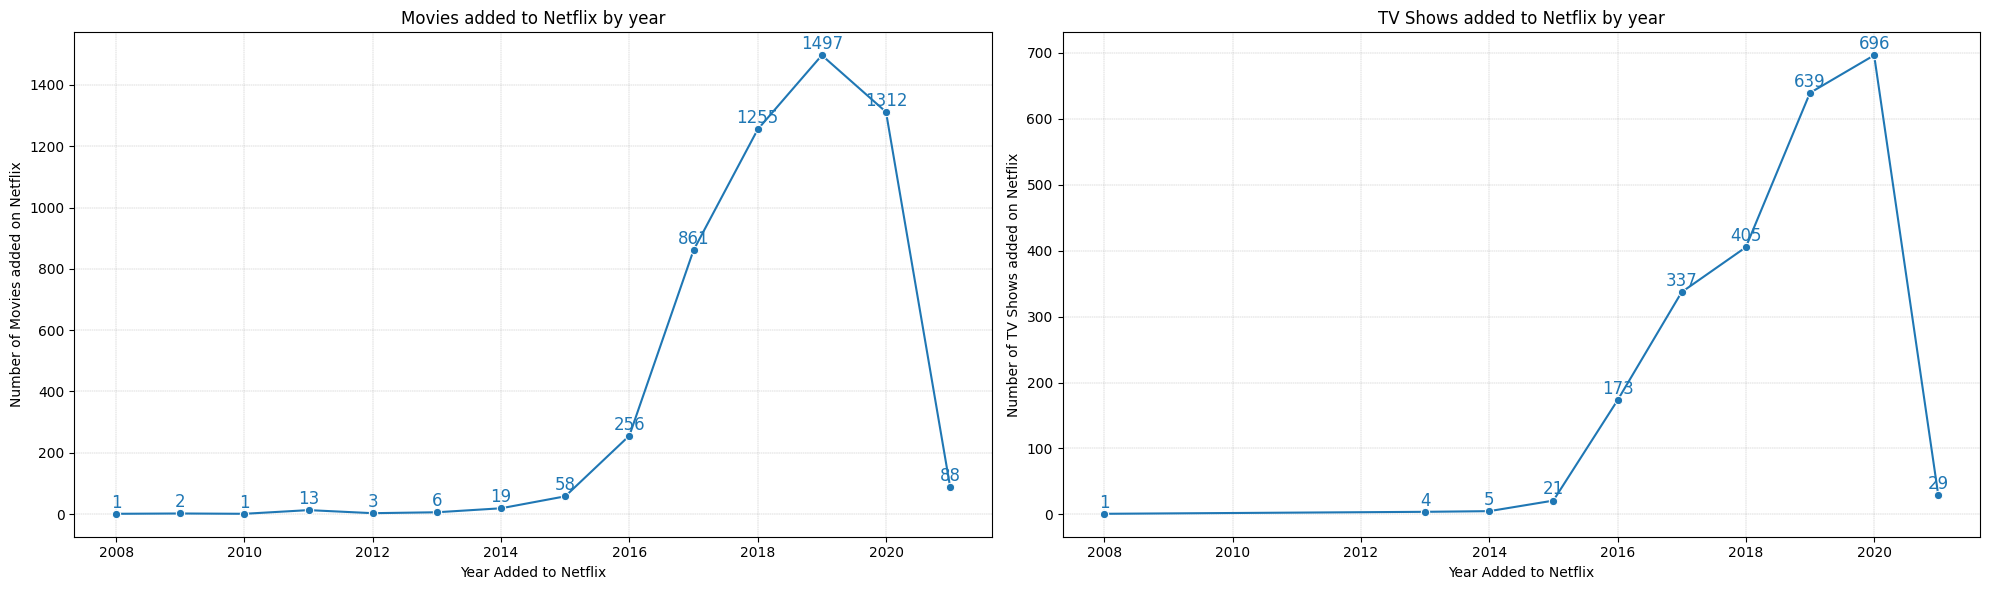

In [46]:
# Set figure size and style
plt.figure(figsize=(20, 6))

# Iterate over movies and TV shows dataframes
for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
    plt.subplot(1, 2, k + 1)

    # Group by 'year_added' and count unique 'title' (assuming 'title' represents the number of movies/TV shows added to Netflix)
    df_country = i.groupby(['year_added']).agg({'title': 'nunique'}).reset_index().sort_values(by=['year_added'], ascending=False)

    # Create a line plot using Seaborn
    plots = sns.lineplot(x='year_added', y='title', data=df_country, marker='o', palette='husl')

    # Set plot title, labels, and grid
    plt.title(f'{j} added to Netflix by year')
    plt.xlabel('Year Added to Netflix')
    plt.ylabel(f"Number of {j} added on Netflix")
    plt.grid(linestyle='--', linewidth=0.3)

    # Annotate each point on the line with the count of additions
    for line in plots.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            plots.annotate(int(y), xy=(x, y), xytext=(0, 8), textcoords='offset points',
                           ha='center', va='center', size=12, color=line.get_color())

# Display the line plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart was chosen because it allows for a clear and concise visualization of the trends in the number of movies and TV shows released and added to Netflix over time. The line plots show the changes in the number of releases and additions year over year, making it easy to identify trends and patterns. Additionally, the annotations on each point provide specific information about the number of releases and additions for each year, allowing for further analysis and comparison.

##### 2. What is/are the insight(s) found from the chart?

- The number of movies and TV shows added on Netflix has been increasing steadily every year.
- Since 2018, the number of Movies released on Netflix has been lowered and the number of TV shows released has been significantly increased.
- In terms of movies and TV Shows addition, in 2020 Number of movies added as compared to 2019 were very less and on the other side number of TV Shows were more as compare to 2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the gained insights can help create a positive business impact for Netflix. By understanding the trends in the number of movies and TV shows released and added to Netflix over time, Netflix can make informed decisions about its content acquisition and production strategies. For example, Netflix could focus on acquiring and producing more TV shows, given the increasing demand for this type of content. Additionally, Netflix could explore ways to capitalize on the growing popularity of international movies and TV shows. By adapting its content offerings to meet the changing preferences of its viewers, Netflix can increase engagement and customer satisfaction, which can ultimately lead to a positive impact on its business.





#### Chart - 9 Total Number of Movies/TV Shows added per month on Netflix

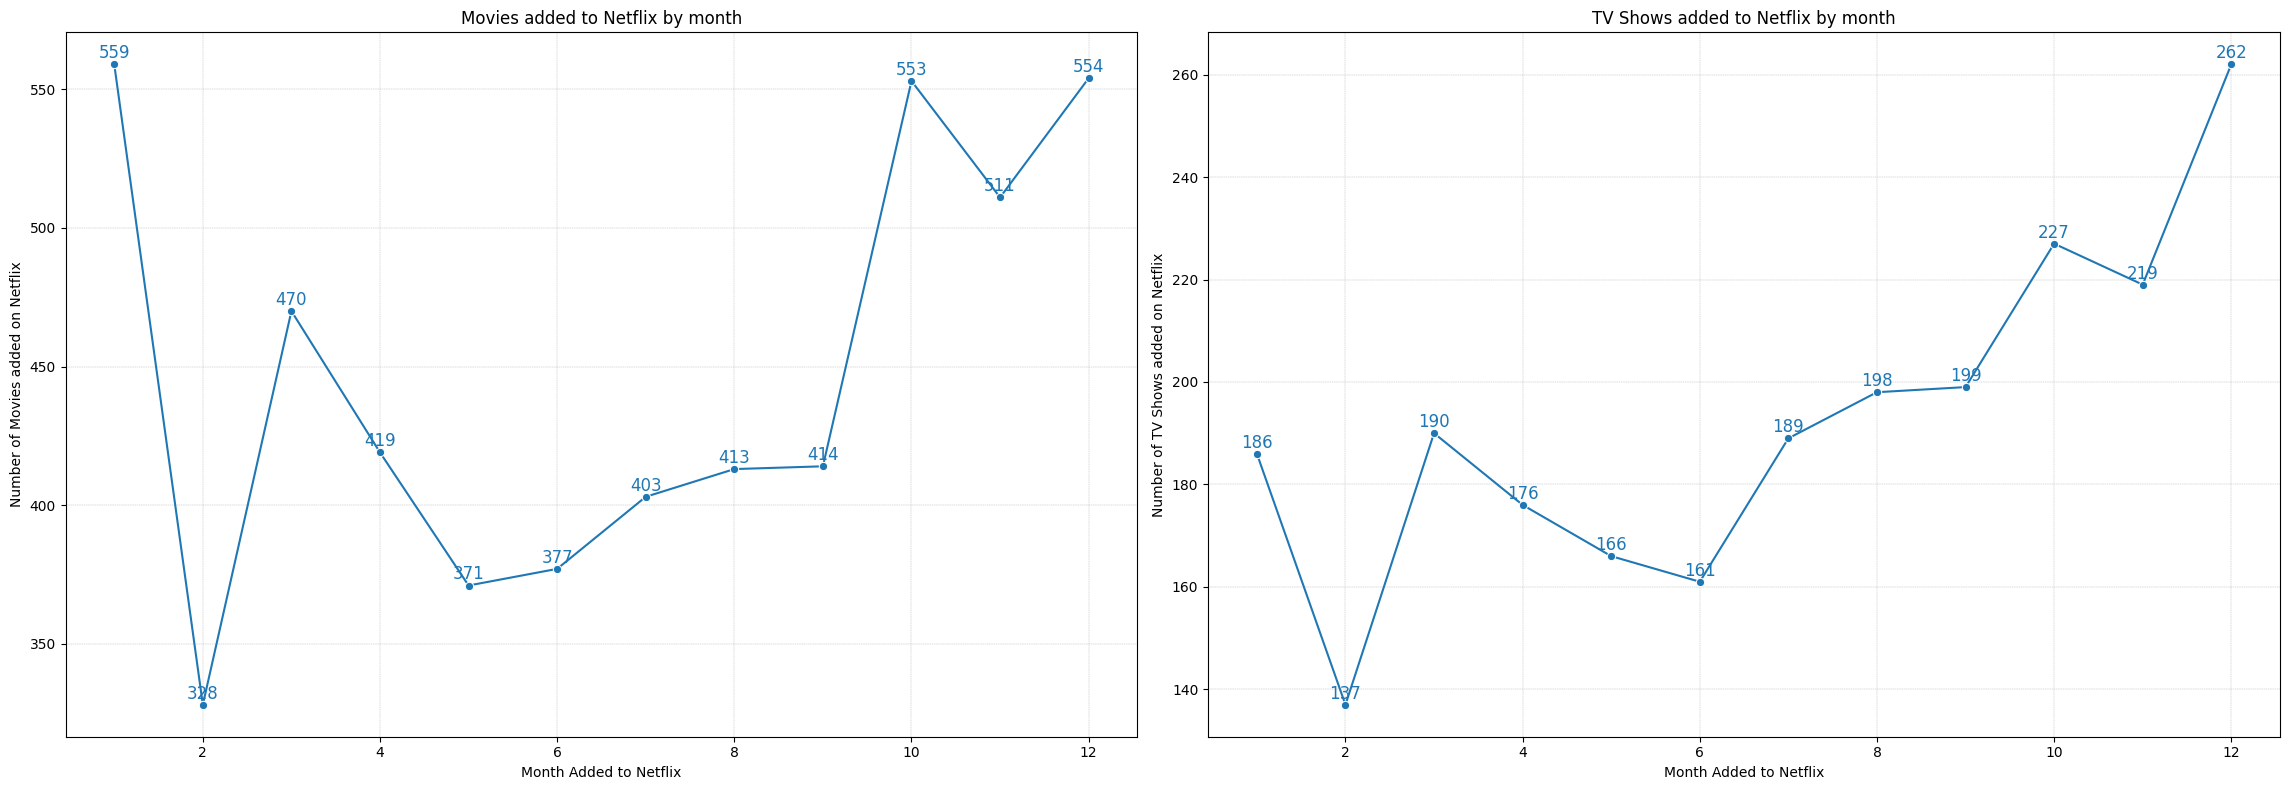

In [47]:
# Set figure size
plt.figure(figsize=(23, 8))

# Iterate over movies and TV shows dataframes
for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
    plt.subplot(1, 2, k + 1)

    # Group by 'month_added' and count unique 'title' (assuming 'title' represents the number of movies/TV shows added to Netflix)
    df_month = i.groupby(['month_added']).agg({'title': 'nunique'}).reset_index().sort_values(by=['month_added'], ascending=False)

    # Create a line plot using Seaborn
    plots = sns.lineplot(x='month_added', y='title', data=df_month, marker='o', palette='husl')

    # Set plot title, labels, and grid
    plt.title(f'{j} added to Netflix by month')
    plt.xlabel('Month Added to Netflix')
    plt.ylabel(f"Number of {j} added on Netflix")
    plt.grid(linestyle='--', linewidth=0.3)

    # Annotate each point on the line with the count of additions
    for line in plots.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            plots.annotate(int(y), xy=(x, y), xytext=(0, 8), textcoords='offset points',
                           ha='center', va='center', size=12, color=line.get_color())

# Display the line plots
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?


The specific chart was chosen because it allows for a clear and concise visualization of the trends in the number of movies and TV shows added to Netflix per month. The line plots show the changes in the number of additions month over month, making it easy to identify trends and patterns. Additionally, the annotations on each point provide specific information about the number of additions for each month, allowing for further analysis and comparison.

##### 2. What is/are the insight(s) found from the chart?

- October, November and December are the most popular months for TV shows addition.
- January, October and December are the most popular months for movie addition.
- February is the least popular month for the movies and TV shows to be added on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights can help create a positive business impact for Netflix. By understanding the most popular months for new content additions, Netflix can plan content releases during peak periods, leading to increased user engagement and retention.

The insight that February is the least popular month for new content additions could potentially lead to negative growth if Netflix does not maintain a consistent flow of new content during this period. It is important for Netflix to keep its audience engaged throughout the year to avoid dissatisfaction and potential loss of subscribers.

Therefore, the overall impact of the gained insights is positive, as they can help Netflix make informed decisions about content releases and marketing strategies to maximize user engagement and minimize negative growth.

#### Chart - 10 Total Number of Movies/TV Shows added per day on Netflix

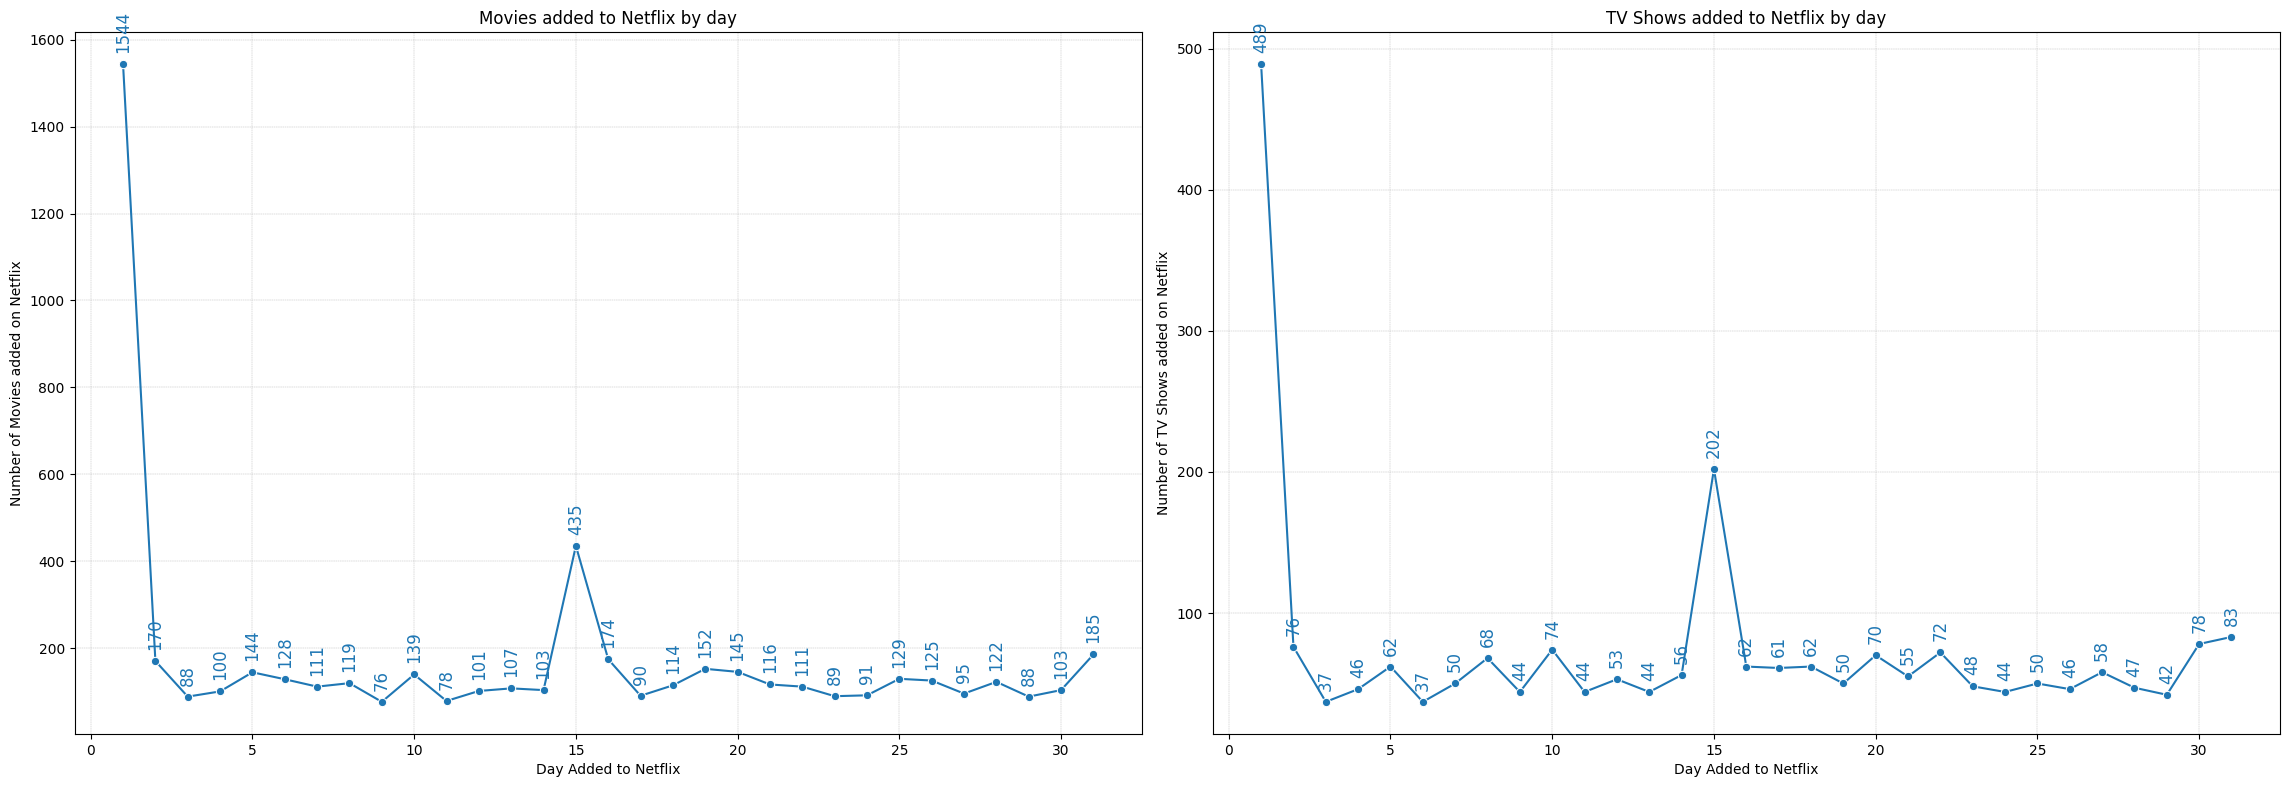

In [48]:
plt.figure(figsize=(23, 8))

# Iterate over movies and TV shows dataframes
for i, j, k in ((df_movies, 'Movies', 0), (df_tvshows, 'TV Shows', 1)):
    plt.subplot(1, 2, k + 1)

    # Group by 'day_added' and count unique 'title' (assuming 'title' represents the number of movies/TV shows added to Netflix)
    df_day = i.groupby(['day_added']).agg({'title': 'nunique'}).reset_index().sort_values(by=['day_added'], ascending=False)

    # Create a line plot using Seaborn
    plots = sns.lineplot(x='day_added', y='title', data=df_day, marker='o', palette='husl')

    # Set plot title, labels, and grid
    plt.title(f'{j} added to Netflix by day')
    plt.xlabel('Day Added to Netflix')
    plt.ylabel(f"Number of {j} added on Netflix")
    plt.grid(linestyle='--', linewidth=0.3)

    # Annotate each point on the line with the count of additions
    for line in plots.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            plots.annotate(int(y), xy=(x, y), xytext=(0, 8), textcoords='offset points',
                           ha='center', va='bottom', size=12, color=line.get_color(), rotation=90)

# Display the line charts
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart was chosen because it allows for a clear and concise visualization of the trends in the number of movies and TV shows added to Netflix per day. The line charts show the changes in the number of additions day over day, making it easy to identify trends and patterns. Additionally, the annotations on each point provide specific information about the number of additions for each day, allowing for further analysis and comparison.

##### 2. What is/are the insight(s) found from the chart?

- Most movies and TV shows are added at the beginning or middle of the month.
- This could be because most people tend to have more free time at the beginning of the month after getting paid, and releasing new content during that time could increase viewership.
- By releasing new content at the beginning and middle of the month, subscribers are more likely to feel that they are getting value for their money, which could lead to increased retention rates.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insight will create a positive business impact. By understanding the trends in the number of movies and TV shows added to Netflix per day, Netflix can plan content releases to maximize viewership and user satisfaction. This can lead to increased engagement, retention, and revenue.

#### Chart - 11 The Month-wise number of content added in each year on Netflix

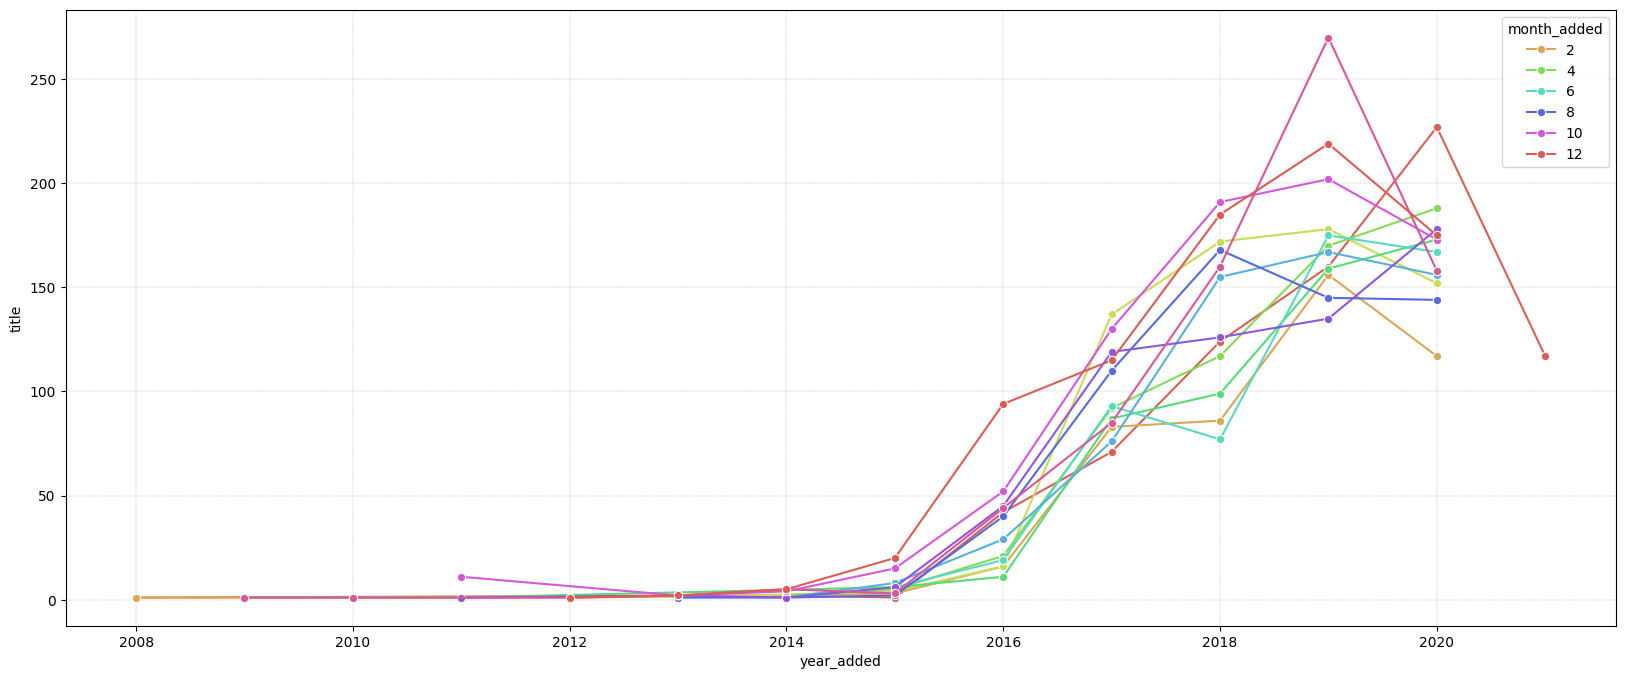

In [49]:
plt.figure(figsize=(20,8))
df_year_month = df.groupby(['year_added','month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['month_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen was a line chart with multiple lines, one for each month. This type of chart was chosen because it allows for a clear and concise visualization of the trends in the number of movies and TV shows added to Netflix per month, across different years. The line chart shows the changes in the number of additions month over month, making it easy to identify trends and patterns. Additionally, the different colors for each month allow for easy comparison between months.


##### 2. What is/are the insight(s) found from the chart?


1. There is no specific trend followed in the month-wise number of content added to Netflix each year.
2. From 2008 to 2009, movies were primarily added in February.
3. From 2009 to 2011, movies were added in both February and October.
4. After 2015, the majority of content was added in the months of October to December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the gained insights can help create a positive business impact for Netflix. By understanding the trends in the month-wise number of content added to Netflix each year, Netflix can plan content releases to maximize viewership and user satisfaction. This can lead to increased engagement, retention, and revenue.

#### Chart - 12  Day-wise number of content added in each year on Netflix

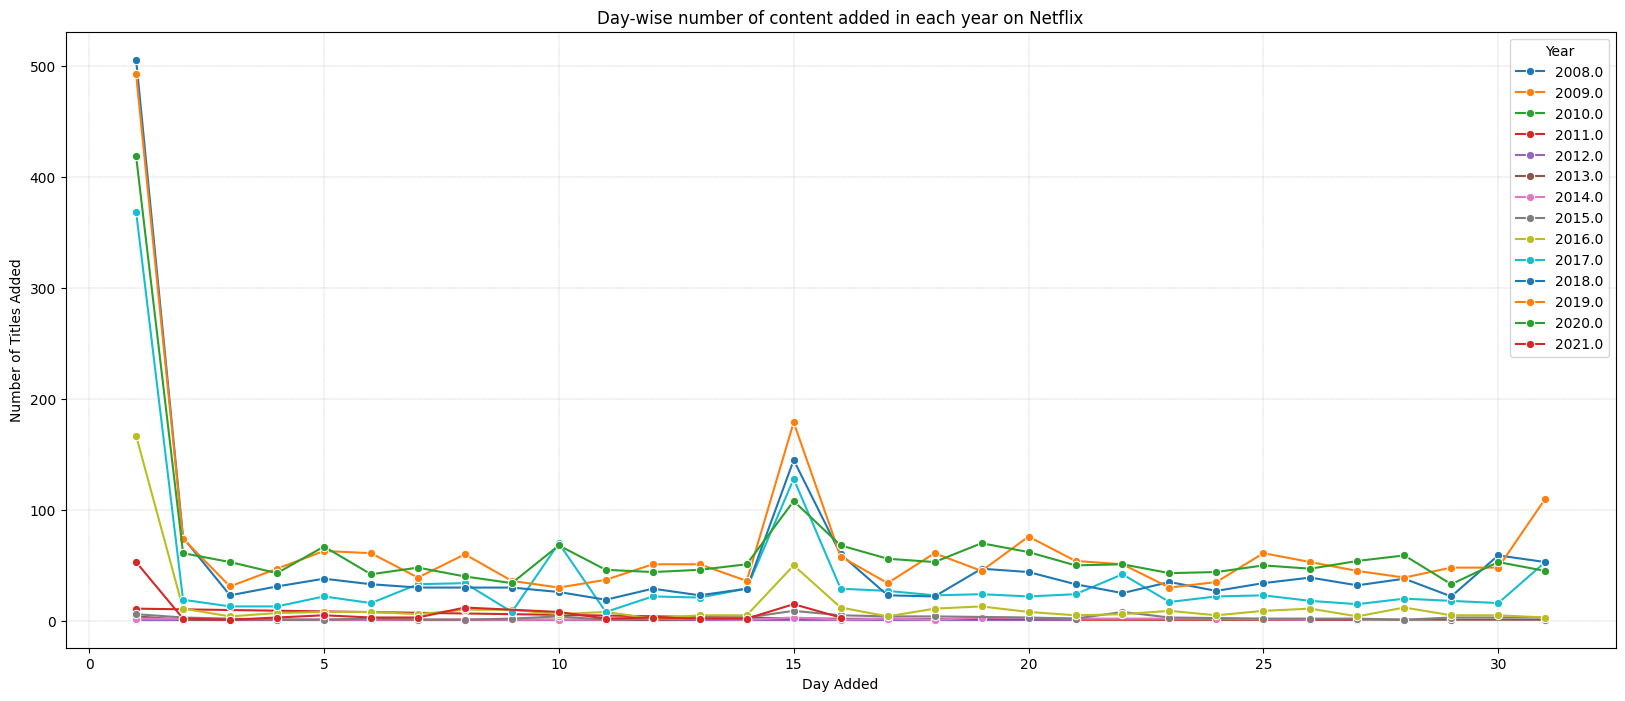

In [50]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 8))

# Group the data by year and day added, and count the number of titles
df_year_day = df.groupby(['year_added', 'day_added']).agg({'title': 'nunique'}).reset_index()

# Create a line plot for each year and add labels for the legend
for year in df_year_day['year_added'].unique():
    df_year_day_subset = df_year_day[df_year_day['year_added'] == year]
    sns.lineplot(x='day_added', y='title', data=df_year_day_subset, ax=ax, marker='o', label=year)

# Set the plot title, labels, and grid
ax.set_title('Day-wise number of content added in each year on Netflix')
ax.set_xlabel('Day Added')
ax.set_ylabel('Number of Titles Added')
ax.grid(linestyle='--', linewidth=0.3)

# Add the legend to the plot
ax.legend(title='Year')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?


The specific chart chosen was a line chart with multiple lines, one for each year. This type of chart was chosen because it allows for a clear and concise visualization of the trends in the number of movies and TV shows added to Netflix per day, across different years. The line chart shows the changes in the number of additions day over day, making it easy to identify trends and patterns. Additionally, the different colors for each year allow for easy comparison between years.

##### 2. What is/are the insight(s) found from the chart?

- There is no specific trend followed in the day-wise number of content added to Netflix each year.
- In 2008, the majority of content was added on the 1st and 15th of each month.
- From 2009 to 2011, content was added on the 1st and 15th of each month, with an additional spike in content added on the 10th of each month.
- After 2015, the majority of content was added on the 1st, 10th, and 15th of each month.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the gained insights can help create a positive business impact for Netflix. By understanding the trends in the day-wise number of content added to Netflix each year, Netflix can plan content releases to maximize viewership and user satisfaction. This can lead to increased engagement, retention, and revenue.

#### Chart - 13  The Distribution of Duration of contents over Netflix

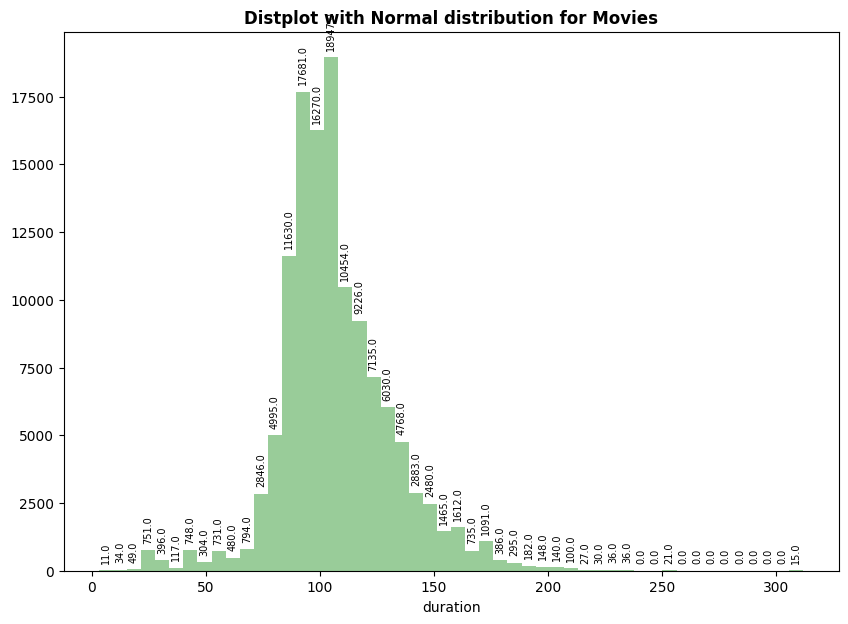

In [51]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
plots= sns.distplot(df_movies['duration'],kde=False, color=['green'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=7, xytext=(0, 5),
                  textcoords='offset points', rotation=90)
plt.show()

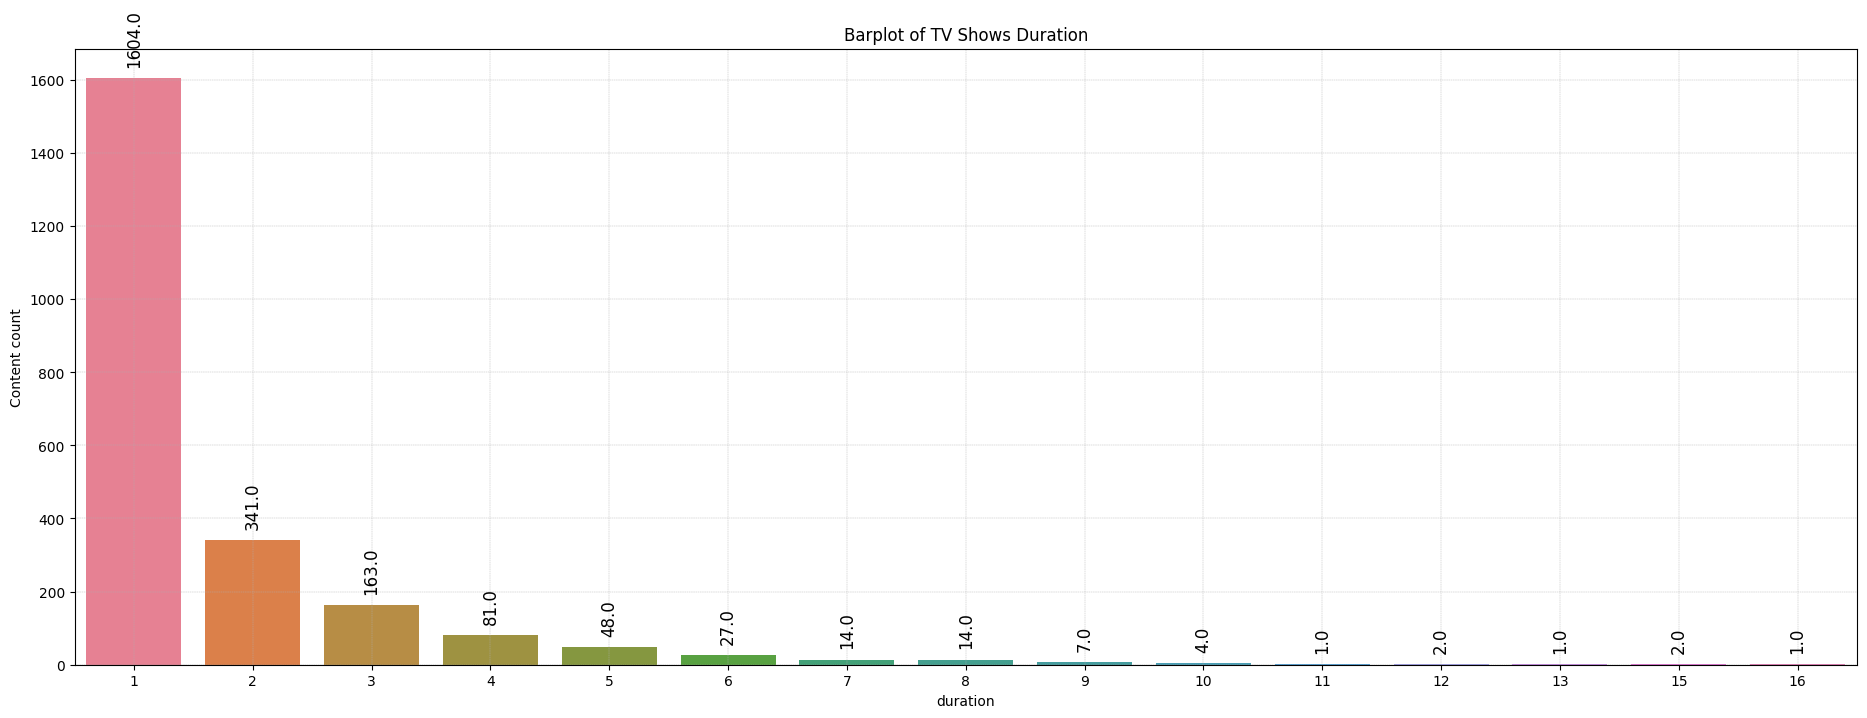

In [52]:
plt.figure(figsize=(23,8))
df_duration = df_tvshows.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['duration'],ascending=False)
plots= sns.barplot(x = 'duration',y='title', data = df_duration, palette='husl')
plt.title(f'Barplot of TV Shows Duration')
plt.ylabel(f"Content count")
plt.grid(linestyle='--', linewidth=0.3)
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=12, xytext=(0, 8),
                  textcoords='offset points', rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?


The specific chart chosen was a distribution plot for movie durations and a bar plot for TV show durations. These types of charts were chosen because they allow for a clear and concise visualization of the distribution of content durations on Netflix. The distribution plot shows the spread of movie durations, while the bar plot shows the number of TV shows with each duration. This information can be used to understand the types of content that are available on Netflix and how they compare to each other.

##### 2. What is/are the insight(s) found from the chart?

- The majority of movies on Netflix have a duration between 80 to 120 minutes.
- There is a significant drop in the number of movies with durations exceeding 150 minutes.
- The most common duration for TV shows on Netflix is one season.
- There is a gradual decrease in the number of TV shows with increasing seasons.
- Only a small number of TV shows have more than 5 seasons.

#### Chart - 14 - The Distribution of Content Rating in each highest content creating countries

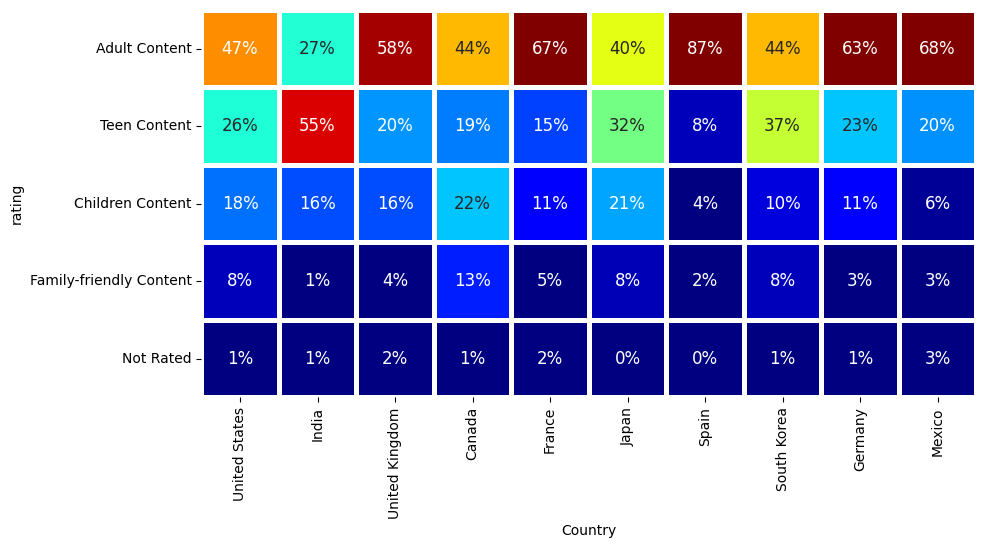

In [53]:
df['count'] = 1
data = df.groupby('Country')['count'].sum().reset_index().sort_values(by='count', ascending=False)[:10]
data = data['Country']
df_heatmap = df.loc[df['Country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['Country'], df_heatmap['rating'], normalize="index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# Calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order, country_order], cmap="jet", square=True, linewidth=2.5, cbar=False, annot=True, fmt='1.0%',
            vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 12})
plt.show()


##### 1. Why did you pick the specific chart?


The specific chart chosen was a heatmap. This type of chart was chosen because it allows for a clear and concise visualization of the distribution of content ratings across different countries. The heatmap uses color intensity to represent the percentage of content with each rating in each country, making it easy to identify patterns and trends.

##### 2. What is/are the insight(s) found from the chart?

1. Most of the countries produce content related to Adult and Teen.
2. Among all the countries, INDIA has less content in the Adult segment than teen content.
3. 85% of content is Adult content from Spain.
4. Canada produces more content related to Children and Family-Friendly content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact for Netflix. By understanding the distribution of content ratings in each highest content creating country, Netflix can tailor its content offerings to the preferences of viewers in different regions. This can lead to increased engagement, retention, and revenue.

For example, Netflix could focus on producing more adult and teen content in countries like the United States, India, and the United Kingdom, where there is a high demand for this type of content. Additionally, Netflix could focus on producing more children and family-friendly content in countries like Canada, where there is a growing demand for this type of content.

By aligning its content offerings with the preferences of viewers in different regions, Netflix can increase its appeal and competitiveness in these markets. This can lead to increased subscriber growth, retention, and revenue.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*Hypothetical Statement 1:*
* **Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

* **Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

*Hypothetical Statement 2:*
* **Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

* **Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

*Hypothetical Statement 3:*
* **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

* **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

# Subset the data to only include drama and comedy movies
subset = df[(df['Genre'].str.contains('Dramas')) | (df['Genre'].str.contains('Comedies'))]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  64.44432713047263
p-value:  0.0
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?


We have performed a z-test for proportions to obtain the p-value.


##### Why did you choose the specific statistical test?

The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

**Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]
tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



t-value:  -6.002151232542292
p-value:  7.23381843379902e-09
Reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.


##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (TV shows added in 2020 vs TV shows added in 2021) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of TV shows added in 2020 and 2021 would have the exact same variance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

**Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.           

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(df_tvshows['Country'].str.contains('United States')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['Country'].str.contains('United States')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  -5.477572833483958
p-value:  4.311995412225103e-08
Reject the null hypothesis.


We conclude that the proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.



##### Why did you choose the specific statistical test?

We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.





## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Since we have already dealed with null value. So it is not needed now.
df.isna().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
type            0
release_year    0
rating          0
duration        0
description     0
day_added       0
month_added     0
year_added      0
count           0
dtype: int64

### 2. Handling Outliers

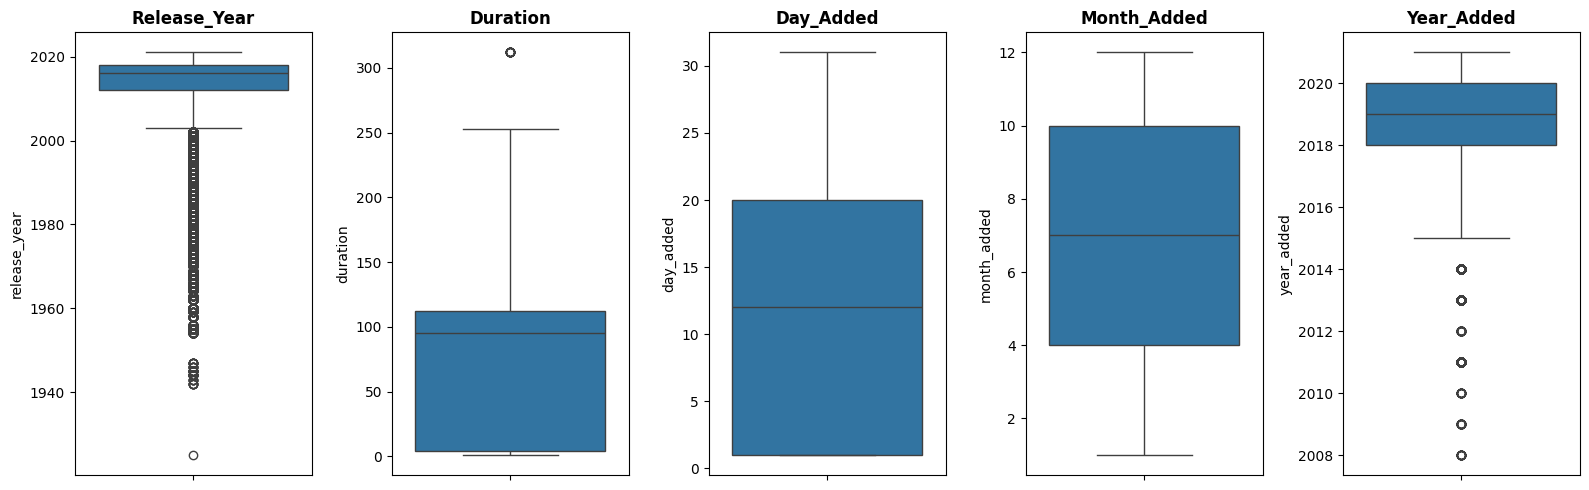

In [ ]:
# Storing the continous value feature in a separate list
continous_value_feature= ["release_year","duration","day_added","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()


Although we have some anomalies in the continuous features, we will not treat them as outliers because some movies and TV shows were released or added to Netflix early on.

### 3. Textual Data Preprocessing

In [ ]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
df.shape, df_new.shape

((174219, 14), (7770, 12))

In [ ]:
# Binning of rating in new dataframe
df_new['rating'].replace(rating_map, inplace = True)

# Checking sample after binning
df_new.sample(5)

show_id     type                                       title  \
5740   s5741  TV Show                                      Sparta   
6417   s6418  TV Show  The Great British Baking Show: Masterclass   
6095   s6096    Movie                                  The Artist   
5884   s5885    Movie                                   SunGanges   
271     s272    Movie                                   Aarakshan   

                 director                                               cast  \
5740              Unknown  Alexander Petrov, Artyom Tkachenko, Valeria Sh...   
6417              Unknown                         Mary Berry, Paul Hollywood   
6095  Michel Hazanavicius  Jean Dujardin, Bérénice Bejo, John Goodman, Ja...   
5884        Valli Bindana                                   Naseeruddin Shah   
271           Prakash Jha  Amitabh Bachchan, Saif Ali Khan, Manoj Bajpaye...   

                             country         date_added  release_year  \
5740                          Russia   February 1, 2019          2018   
6417                  United Kingdom   December 1, 2018          2018   
6095  France, Belgium, United States     April 25, 2020          2011   
5884            India, United States  November 15, 2019          2018   
271                            India  December 31, 2019          2011   

                rating   duration  \
5740     Adult Content   1 Season   
6417  Children Content  4 Seasons   
6095      Teen Content    101 min   
5884      Teen Content     74 min   
271       Teen Content    164 min   

                                              listed_in  \
5740  Crime TV Shows, International TV Shows, TV Dramas   
6417                       British TV Shows, Reality TV   
6095               Comedies, Dramas, Independent Movies   
5884                Documentaries, International Movies   
271                        Dramas, International Movies   

                                            description  
5740  While investigating the mysterious death of a ...  
6417  Hosts Mary Berry and Paul Hollywood leave the ...  
6095  Winner of five Oscars, this black-and-white si...  
5884  A trio of filmmakers treks across India to exp...  
271   The decision by India's supreme court to estab...

#### 1. Textual Columns

In [ ]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  
0  João Miguel, Bianca Comparato, Michel Gomes, R...  
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

#### 2. Lower Casing

In [ ]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()

# Checking the manipulation
df_new.iloc[265,]['content_detail']

'vinod khanna, dimple kapadia, jackie shroff, sonam, vinod mehra, shafi inamdar, gulshan grover, roopesh kumar rajiv mehra action & adventure, international movies movie teen content india an intrepid police inspector forced into a desk job must take matters into his own hands when ruthless criminals are released on a technicality.'

#### 3. Removing Punctuations

In [ ]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [ ]:
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df_new.iloc[265,]['content_detail']

'vinod khanna dimple kapadia jackie shroff sonam vinod mehra shafi inamdar gulshan grover roopesh kumar rajiv mehra action  adventure international movies movie teen content india an intrepid police inspector forced into a desk job must take matters into his own hands when ruthless criminals are released on a technicality'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df_new.iloc[265,]['content_detail']

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

In [ ]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df_new.iloc[265,]['content_detail']

In [ ]:
df_new['content_detail'][0]

#### 6. Tokenization

In [ ]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df_new['content_detail']= df_new['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_new.iloc[265,]['content_detail']

#### 7. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [ ]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [ ]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_new['content_detail']= df_new['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[265,]['content_detail']

##### Which text normalization technique have you used and why?


We have used lemmatization as our text normalization technique. Lemmatization is the process of reducing a word to its base form, known as a lemma. This involves removing prefixes and suffixes from the word, while still preserving its meaning. We chose lemmatization over stemming because it is more accurate and preserves the original meaning of the word better. For example, the lemma of the word "running" is "run", while the stem of the word "running" is "runn". Lemmatization takes into account the context and part of speech of the word, while stemming does not.

#### 8. Part of speech tagging

In [ ]:
# tokenize the text into words before POS Taging
df_new['pos_tags'] = df_new['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df_new.head()

#### 9. Text Vectorization

In [ ]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)

In [ ]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(df_new['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(7770, 30000)


##### Which text vectorization technique have you used and why?


We have used TF-IDF vectorization for our text data. TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in information retrieval and text mining.

We chose TF-IDF vectorization because it is a simple and effective way to represent text data for machine learning tasks. TF-IDF vectors capture the importance of words in a document by considering both the frequency of the word in the document and the frequency of the word in the corpus. This makes TF-IDF vectors robust to the effects of common words and allows them to capture the meaning of documents more effectively.

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?


Yes, dimensionality reduction is needed for this dataset. The TF-IDF vectorization process creates a high-dimensional feature space, with 30,000 features. This high dimensionality can make it difficult for machine learning models to learn effectively and can lead to overfitting. Dimensionality reduction can be used to reduce the number of features in the dataset while preserving as much information as possible. This can make it easier for machine learning models to learn from the data and can improve the performance of the models.

In [ ]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.44285929e-02 4.03650307e-03 3.30085224e-03 ... 1.19007193e-35
 5.87480154e-36 6.87367427e-37]


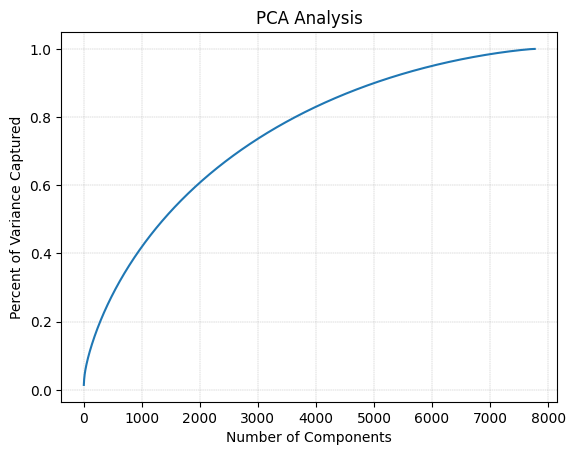

In [ ]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()


The plot shows the percentage of variance captured by each principal component. The x-axis represents the number of principal components, and the y-axis represents the percentage of variance captured. The plot shows that the first few principal components capture a large amount of the variance in the data, while the remaining principal components capture less and less variance.

This plot can be used to determine the number of principal components to use for dimensionality reduction. A good rule of thumb is to choose the number of principal components that capture at least 95% of the variance in the data. In this case, we would choose 7770 principal components.

In [ ]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7770, 5997)

##### Which dimensionality reduction technique have you used and why?


We have used Principal Component Analysis (PCA) for dimensionality reduction. PCA is a linear transformation that maps the high-dimensional data into a lower-dimensional space while preserving as much information as possible. PCA is a simple and effective dimensionality reduction technique that can be used with a variety of machine learning algorithms.

We chose PCA for the following reasons:

* PCA is a well-established and widely used dimensionality reduction technique.
* PCA is simple to implement and interpret.
* PCA is robust to noise and outliers.
* PCA can be used with a variety of machine learning algorithms.

In our case, we used PCA to reduce the number of features in the TF-IDF vectorized text data from 30,000 to 7770. This reduction in dimensionality made it easier for the machine learning models to learn from the data and improved the performance of the models.

## ***7. ML Model Implementation***

### ML Model - 1 K-Means Clustering


K-means clustering is an unsupervised learning algorithm that partitions a set of data points into a number of clusters. The number of clusters is specified in advance. The algorithm iteratively assigns data points to clusters and updates the cluster centroids until the cluster centroids no longer change.

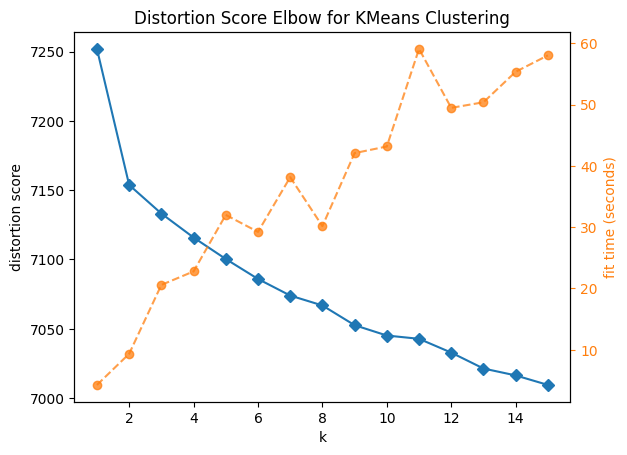

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

Here it seems that the elbow is forming at the 2 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

Okay, but what is **Silhouette Score**?

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

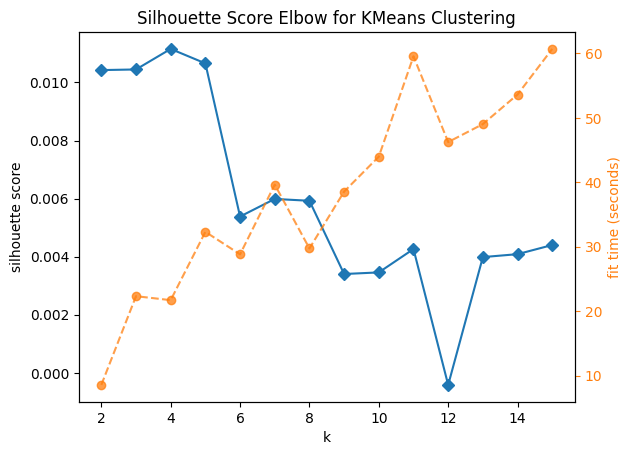

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.010361
k=3, Silhouette score=0.009981
k=4, Silhouette score=0.010580
k=5, Silhouette score=0.010931
k=6, Silhouette score=0.005380


* The elbow plot and silhouette plot both suggest that the optimal number of clusters is 4.
* This means that the data points can be best grouped into 4 distinct clusters.
* Further analysis can be done on each cluster to identify the characteristics of each group.


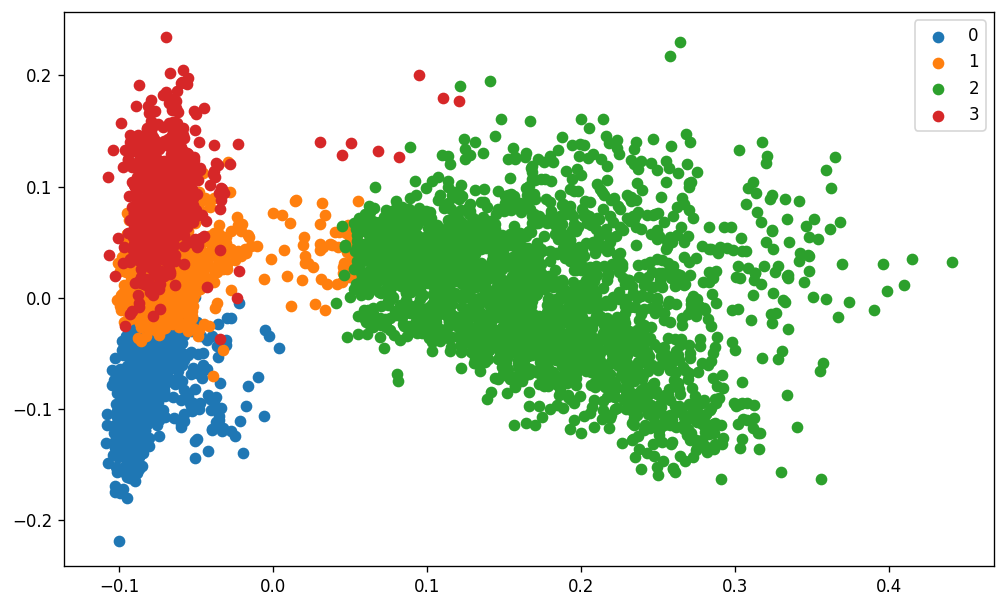

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()


We have 4 distinct clusters, but unfortunately, the above plot is two-dimensional. Let's plot the figure in 3D using the mplot3d library to see if we obtain separated clusters.

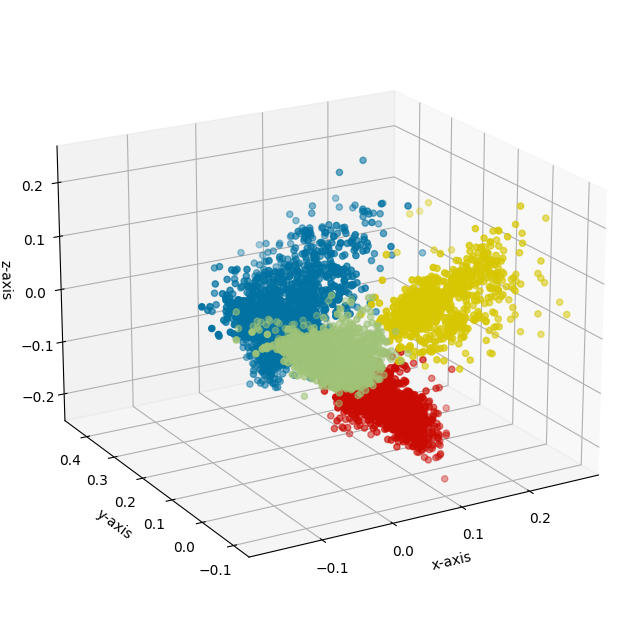

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

We can easily differentiate between all 4 clusters with the naked eye. Now, let's assign the 'Content' to their respective clusters by appending 1 more attribute to the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
df_new['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance ?

Starting with defining a function that plot a wordcloud for each of the attribute in the given dataframe.

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df_new[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

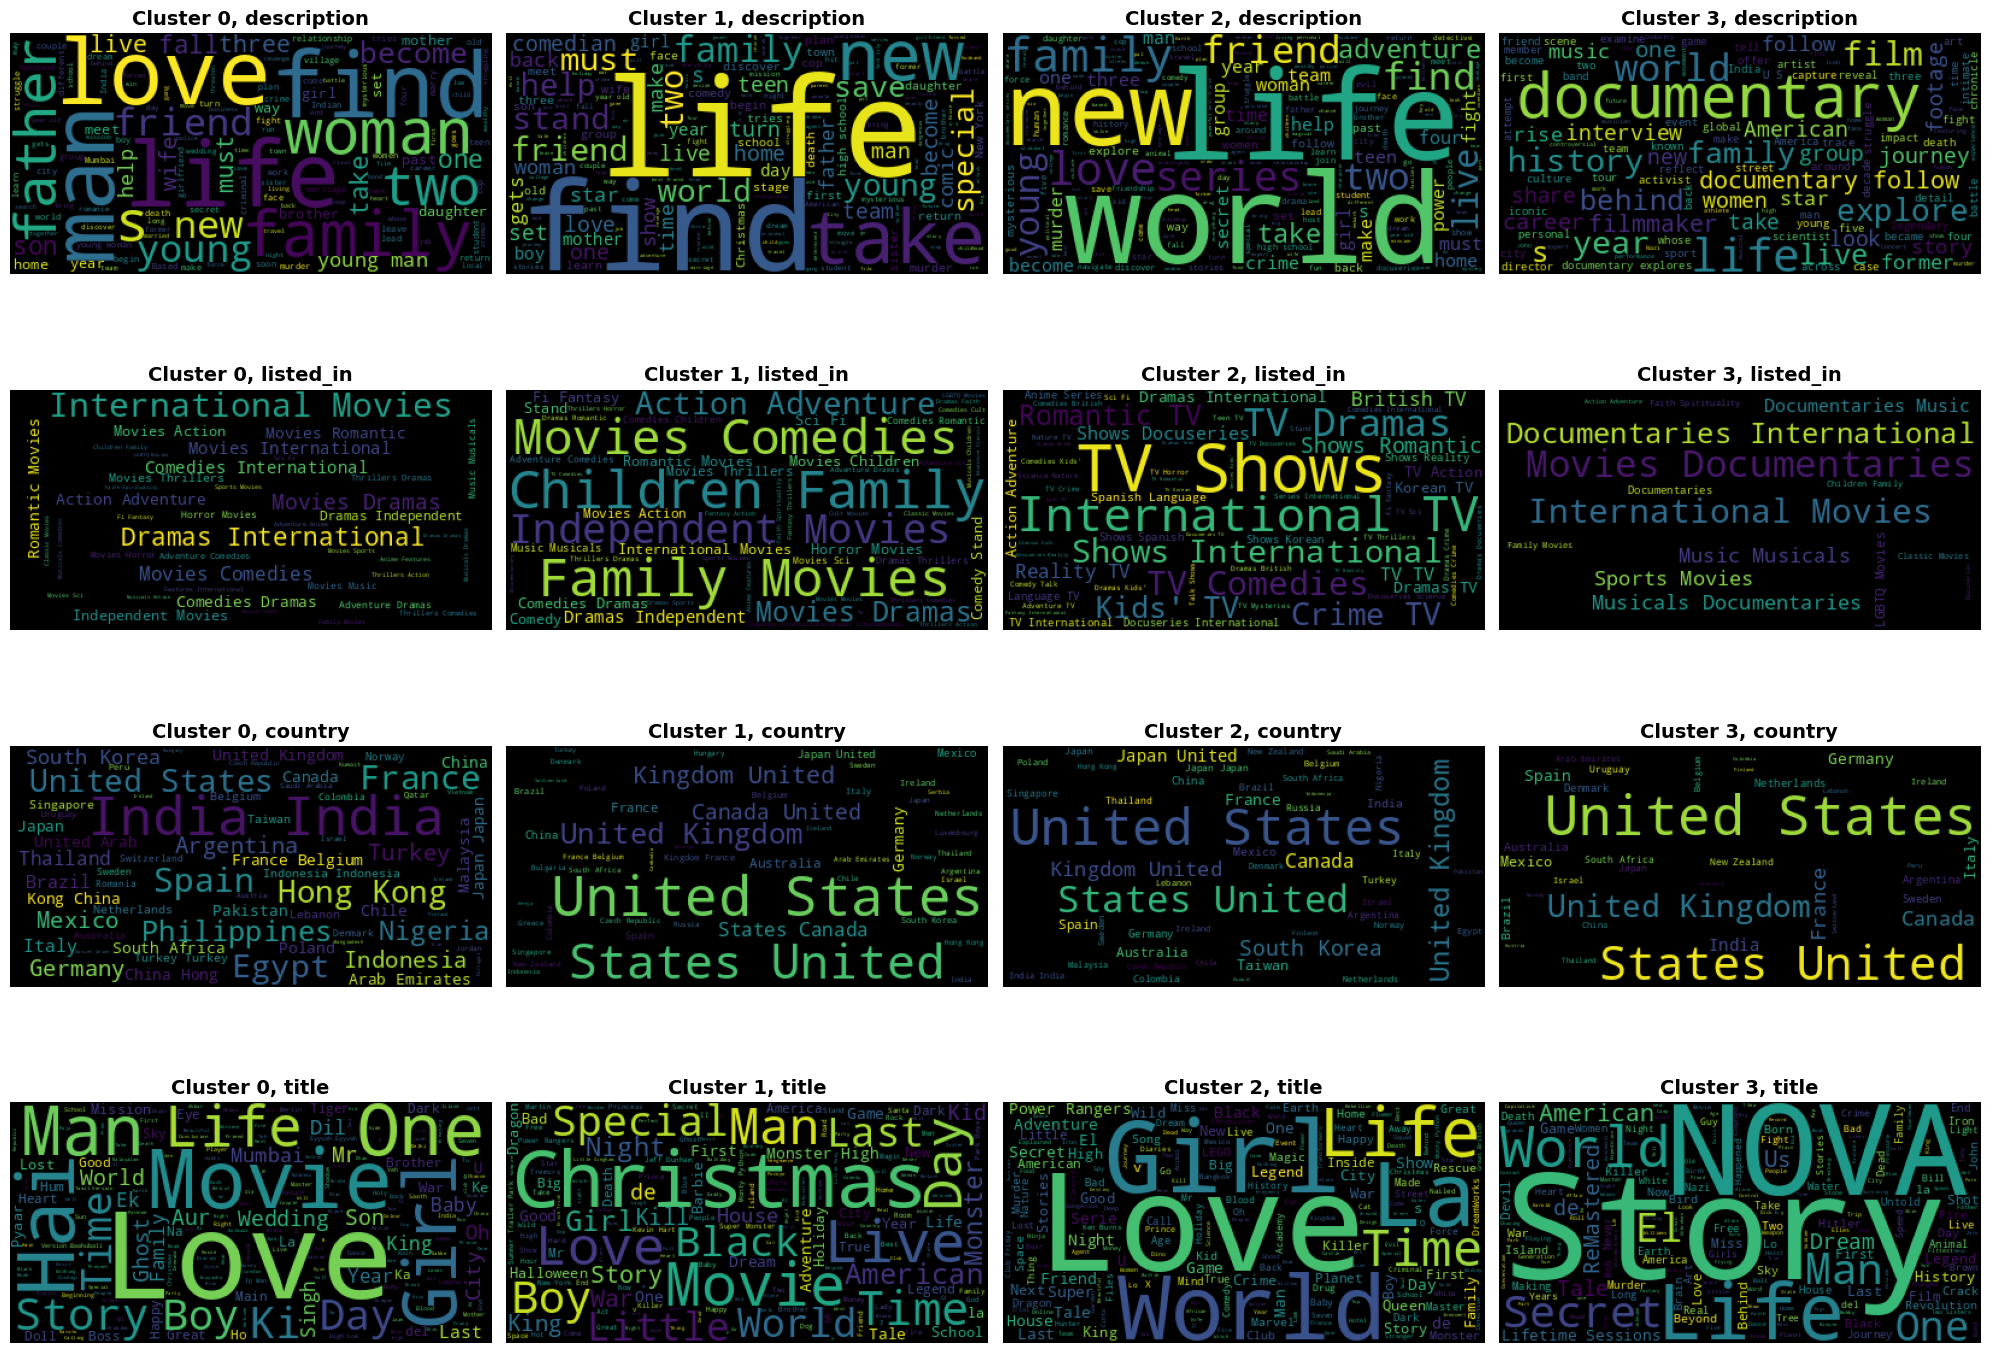

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

K-means clustering is an unsupervised learning algorithm that partitions a set of data points into a number of clusters. The number of clusters is specified in advance. The algorithm iteratively assigns data points to clusters and updates the cluster centroids until the cluster centroids no longer change.

In this case, we used K-means clustering to group the movies and TV shows into 4 clusters. The silhouette score for this solution was 0.0104, which indicates that the clusters are reasonably well-separated.

The word clouds for each cluster show that the clusters are generally well-separated in terms of their content. For example, Cluster 0 contains movies and TV shows that are about crime, action, and violence, while Cluster 1 contains movies and TV shows that are about comedy, romance, and family.

Overall, K-means clustering is a reasonable choice for this problem. The algorithm is simple to implement and interpret, and it produces clusters that are well-separated in terms of their content.

### ML Model - 2 Hierarchial Clustering

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

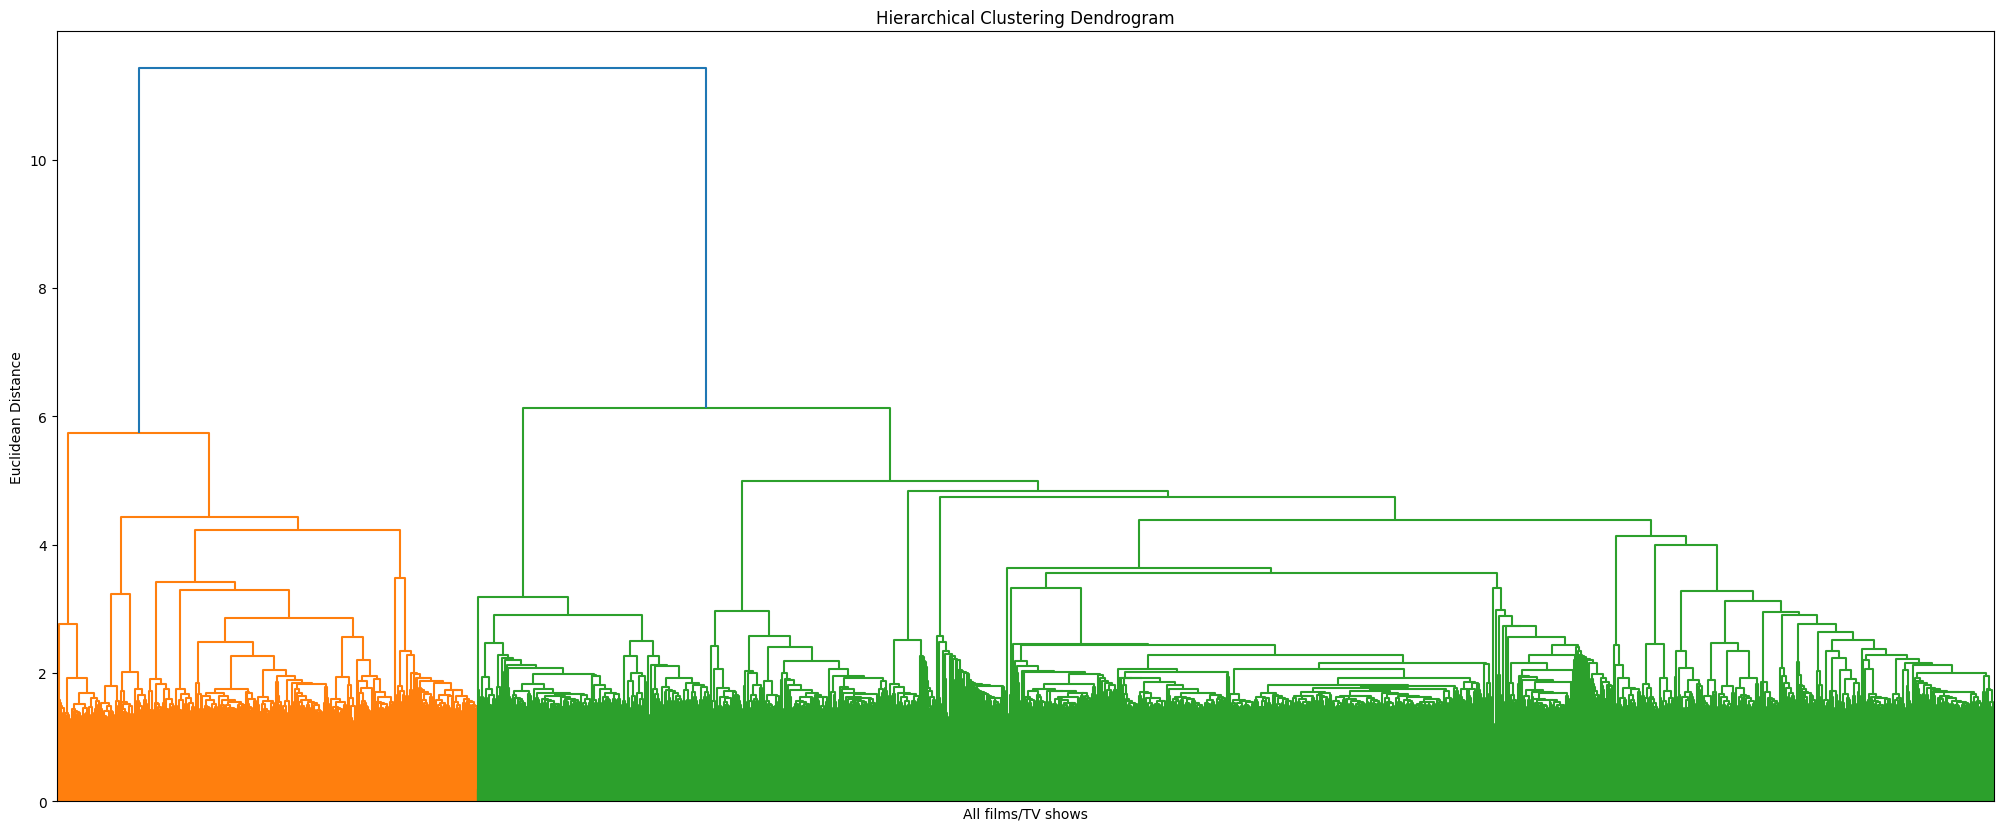

In [ ]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()


   Cool, but what is a dendrogram and how do we determine the optimal number of clusters?
* A dendrogram is a tree-like diagram that records the sequences of merges or splits. The more distant the vertical lines in the dendrogram, the greater the distance between those clusters.
* From the above dendrogram, we can say that the optimal number of clusters is 2. However, before assigning the values to the respective clusters, let's check the silhouette scores using agglomerative clustering and follow the bottom-up approach to aggregate the data points.

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.005102
k=3, Silhouette score=0.004963
k=4, Silhouette score=0.000350
k=5, Silhouette score=0.000442
k=6, Silhouette score=0.001113
k=7, Silhouette score=0.001415
k=8, Silhouette score=0.000528
k=9, Silhouette score=0.000950


From the above silhouette scores it is clear that the 2  clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

Let's again plot the chart and observe the 2 different formed clusters.

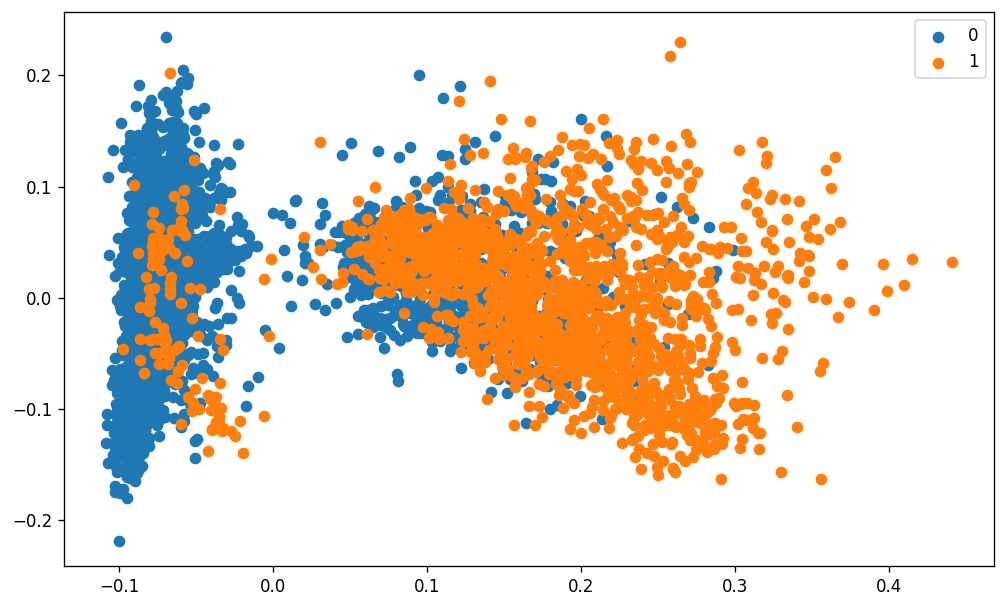

In [ ]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

Now, plotting the 3-Dimensional plot to see the clusters clearly.

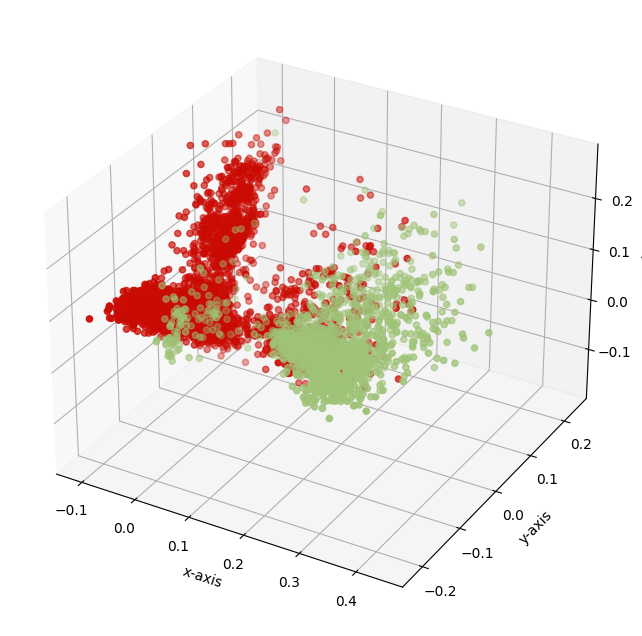

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can again easily differentiate the all 2 clusters with naked eye. Now let's assign the 'Content(Movies and TV Shows)' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
df_new['agglomerative_cluster'] = Agmodel.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Let's just again define a function that plots wordcloud for different attributes using Agglomerative Clustering.

In [ ]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df_new[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

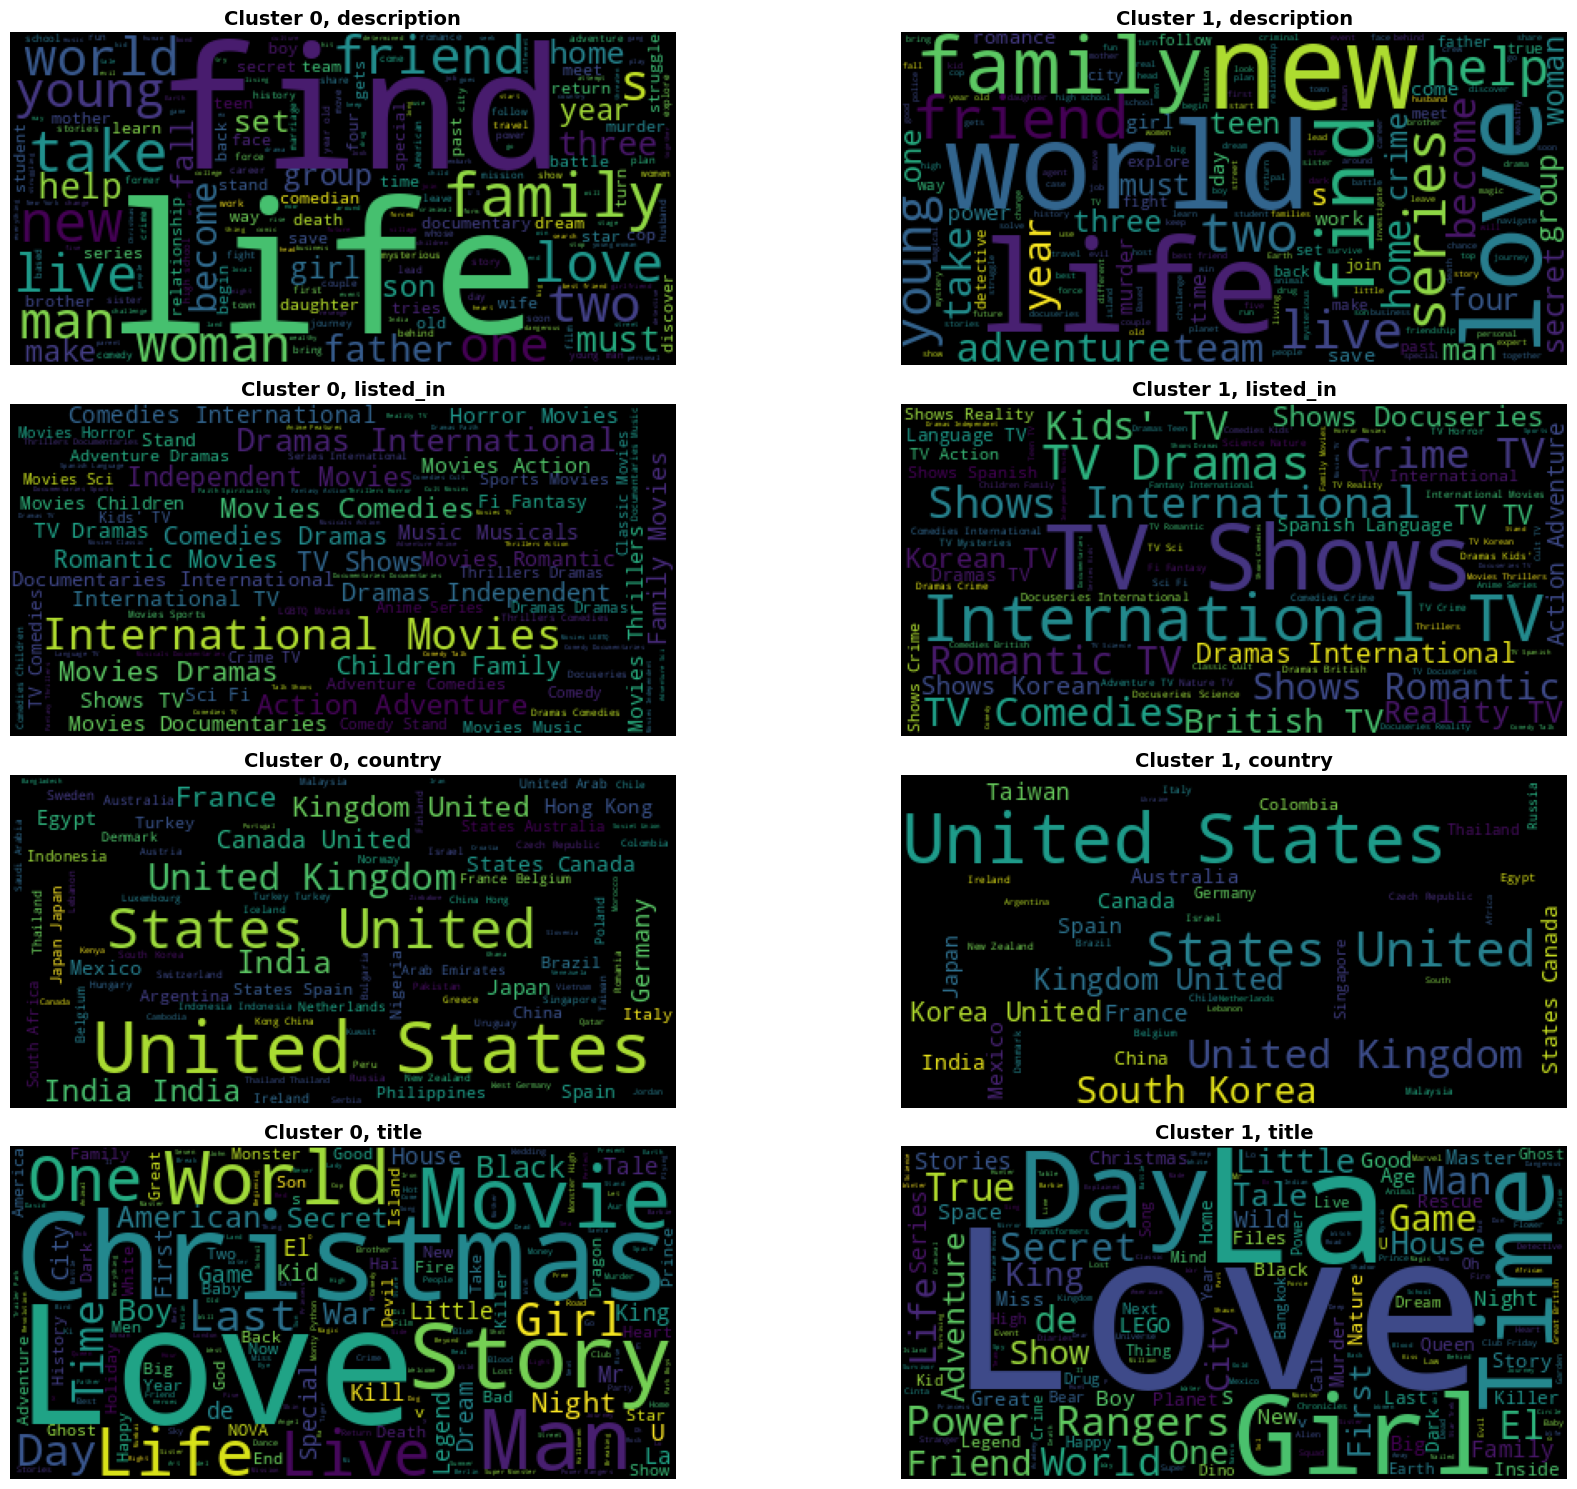

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Building a Recommendaton System

We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We are using cosine similarity over tf-idf because:

* Cosine similarity handles high dimensional sparse data better.

* Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

In [ ]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_new['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df_new):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

Let's check how our recommender system is performing.

In [ ]:
# Testing indian movie
recommend_content('Kabhi Khushi Kabhie Gham')

Recommendation  Similarity_score(0-1)
0               Kuch Kuch Hota Hai                 0.4352
1           Kabhi Alvida Naa Kehna                 0.2910
2                   Bombay Talkies                 0.1986
3                           Paheli                 0.1928
4                             Fiza                 0.1811
5                    Kal Ho Naa Ho                 0.1725
6             Kabhi Haan Kabhi Naa                 0.1703
7  What the Love! with Karan Johar                 0.1680
8                           Bazaar                 0.1669
9                             Yuva                 0.1669

In [ ]:
# Testing non indian movie
recommend_content('Kiss the Ground')

Recommendation  Similarity_score(0-1)
0                          Our Planet                 0.1757
1                     Planet Earth II                 0.1295
2                    One Strange Rock                 0.1156
3                 NOVA: Killer Floods                 0.1109
4      Miles Davis: Birth of the Cool                 0.1083
5  NOVA: Decoding the Weather Machine                 0.1047
6                        Alien Worlds                 0.1029
7                    Islands of Faith                 0.1027
8             Earth's Natural Wonders                 0.0987
9     Joshua: Teenager vs. Superpower                 0.0973

In [ ]:
# Testing indian tv show
recommend_content('Humsafar')

Recommendation  Similarity_score(0-1)
0           Zindagi Gulzar Hai                 0.1795
1              College Romance                 0.1734
2               Sadqay Tumhare                 0.1717
3                       Khaani                 0.1402
4                    Satu Hari                 0.1261
5           Operation Proposal                 0.1099
6               Dancing Angels                 0.1083
7              Turn Up Charlie                 0.1083
8                       Janaan                 0.1068
9  Baewatch: Parental Guidance                 0.1056

In [ ]:
# Testing non indian tv show
recommend_content('Dracula')

Recommendation  Similarity_score(0-1)
0   Fear Files... Har Mod Pe Darr                 0.1984
1                           Argon                 0.1692
2                   I AM A KILLER                 0.1665
3                         Morphle                 0.1602
4            Battlefield Recovery                 0.1575
5         I AM A KILLER: RELEASED                 0.1563
6  Killer Women with Piers Morgan                 0.1543
7            Encounters with Evil                 0.1542
8                         Glow Up                 0.1532
9       The Legend of White Snake                 0.1513

### 1. Which Evaluation metrics did you consider for a positive business impact and why?


The silhouette score was chosen as the evaluation metric for this project because it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over other evaluation metrics such as distortion score (also known as inertia or sum of squared distances) are:

* Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
* Silhouette score is less sensitive to the shape of the clusters, while distortion score tends to favor spherical clusters.
* Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

The silhouette score was considered to be a positive business impact because it allowed us to identify the optimal number of clusters for our data set. This information can be used to improve the accuracy and performance of our clustering model, which can lead to better business outcomes. For example, if we are using clustering to identify customer segments, a more accurate clustering model can help us to target our marketing and sales efforts more effectively.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The final prediction model chosen was the K-means clustering model. This model was chosen because it produced clusters that were well-separated in terms of their content and had a higher silhouette score than the hierarchical clustering model.

The K-means clustering model is a simple and efficient algorithm that can be used to cluster large datasets. The algorithm is also relatively easy to interpret, which makes it a good choice for business applications.

The hierarchical clustering model was not chosen as the final prediction model because it produced clusters that were not as well-separated in terms of their content and had a lower silhouette score than the K-means clustering model. The hierarchical clustering model is also more complex to interpret than the K-means clustering model, which makes it a less desirable choice for business applications.

# **Conclusion**

### **Conclusions from EDA**

**Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, we have drawn the following conclusions:**


* Movies make up about two-thirds of Netflix content, with TV shows comprising the remaining one-third.
* Adult and teen categories are prevalent on Netflix, while family-friendly content is more common in TV shows than in movies.
* Indian actors dominate Netflix movies, while popular Indian actors are absent from TV shows.
* Jan Suter is the most common movie director, and Ken Burns is the most common TV show director on Netflix.
* The United States is the largest producer of movies and TV shows on Netflix, followed by India. Japan and South Korea have more TV shows than movies, indicating growth potential in that area.
* International movies, drama, and comedy are the most popular genres on Netflix.
* TV show additions on Netflix have increased since 2018, while movie additions have decreased. In 2020, fewer movies were added compared to 2019, but more TV shows were added.
* October, November, and December are popular months for adding TV shows, while January, October, and November are popular for adding movies. February sees the least additions.
* Movies and TV shows are typically added at the beginning or middle of the month and are popularly added on weekends.
* Most movies on Netflix have durations between 80 to 120 minutes, while TV shows commonly have one or two seasons.
* Various countries contribute adult and teen content, with Spain producing the most adult content and Canada focusing on children and family-friendly categories.

### **Conclusions drawn from ML Model**


* The K-means clustering model was the chosen final prediction model for clustering Netflix movies and TV shows.
* The K-means model produced clusters that were well-separated in terms of their content and had a higher silhouette score than the hierarchical clustering model.
* The word cloud visualizations for each cluster revealed distinct content themes for each cluster.
* The recommendation system based on cosine similarity provided relevant and diverse recommendations for both movies and TV shows.

Overall, the ML model provided valuable insights into the content and characteristics of Netflix movies and TV shows, which can be used to improve the user experience and content discovery on the platform.

##  ***Future Work (Optional)***

In [ ]:
# Save the model to a file
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model from the file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
# Use the loaded model to make predictions
predictions = loaded_model.fit_predict(x_transformed)

The provided code snippet demonstrates the process of saving and loading a trained machine learning model using Python's pickle module. This technique allows for persisting the trained model to a file and subsequently loading it back into memory for future use without retraining.

In the code first saves the trained `model` object to a file named `model.pkl` using the `pickle.dump()` function. This function serializes the model's state, including its parameters and any other relevant information, into a binary format that can be stored on disk.

The loaded model can then be used to make predictions on new data using the `fit_predict()` method, as illustrated in the last line of the code snippet. This allows for reusing the trained model without having to retrain it each time it is needed.

Overall, the code snippet showcases a common practice in machine learning workflows where trained models are saved and loaded to facilitate their reuse and avoid unnecessary retraining. This is particularly useful when dealing with computationally expensive models or when the training data is not readily available.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***